<a href="https://colab.research.google.com/github/RaghadQadah/Text-Line-Extraction-for-Arabic-Handwritten-Documents/blob/main/TextLineExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display, clear_output


# **load input images**

In [4]:
image1 = cv2.imread("drive/My Drive/image.png")
image2 = cv2.imread("drive/My Drive/image2.png")
image3 = cv2.imread("drive/My Drive/image3.png")


# **show input images**

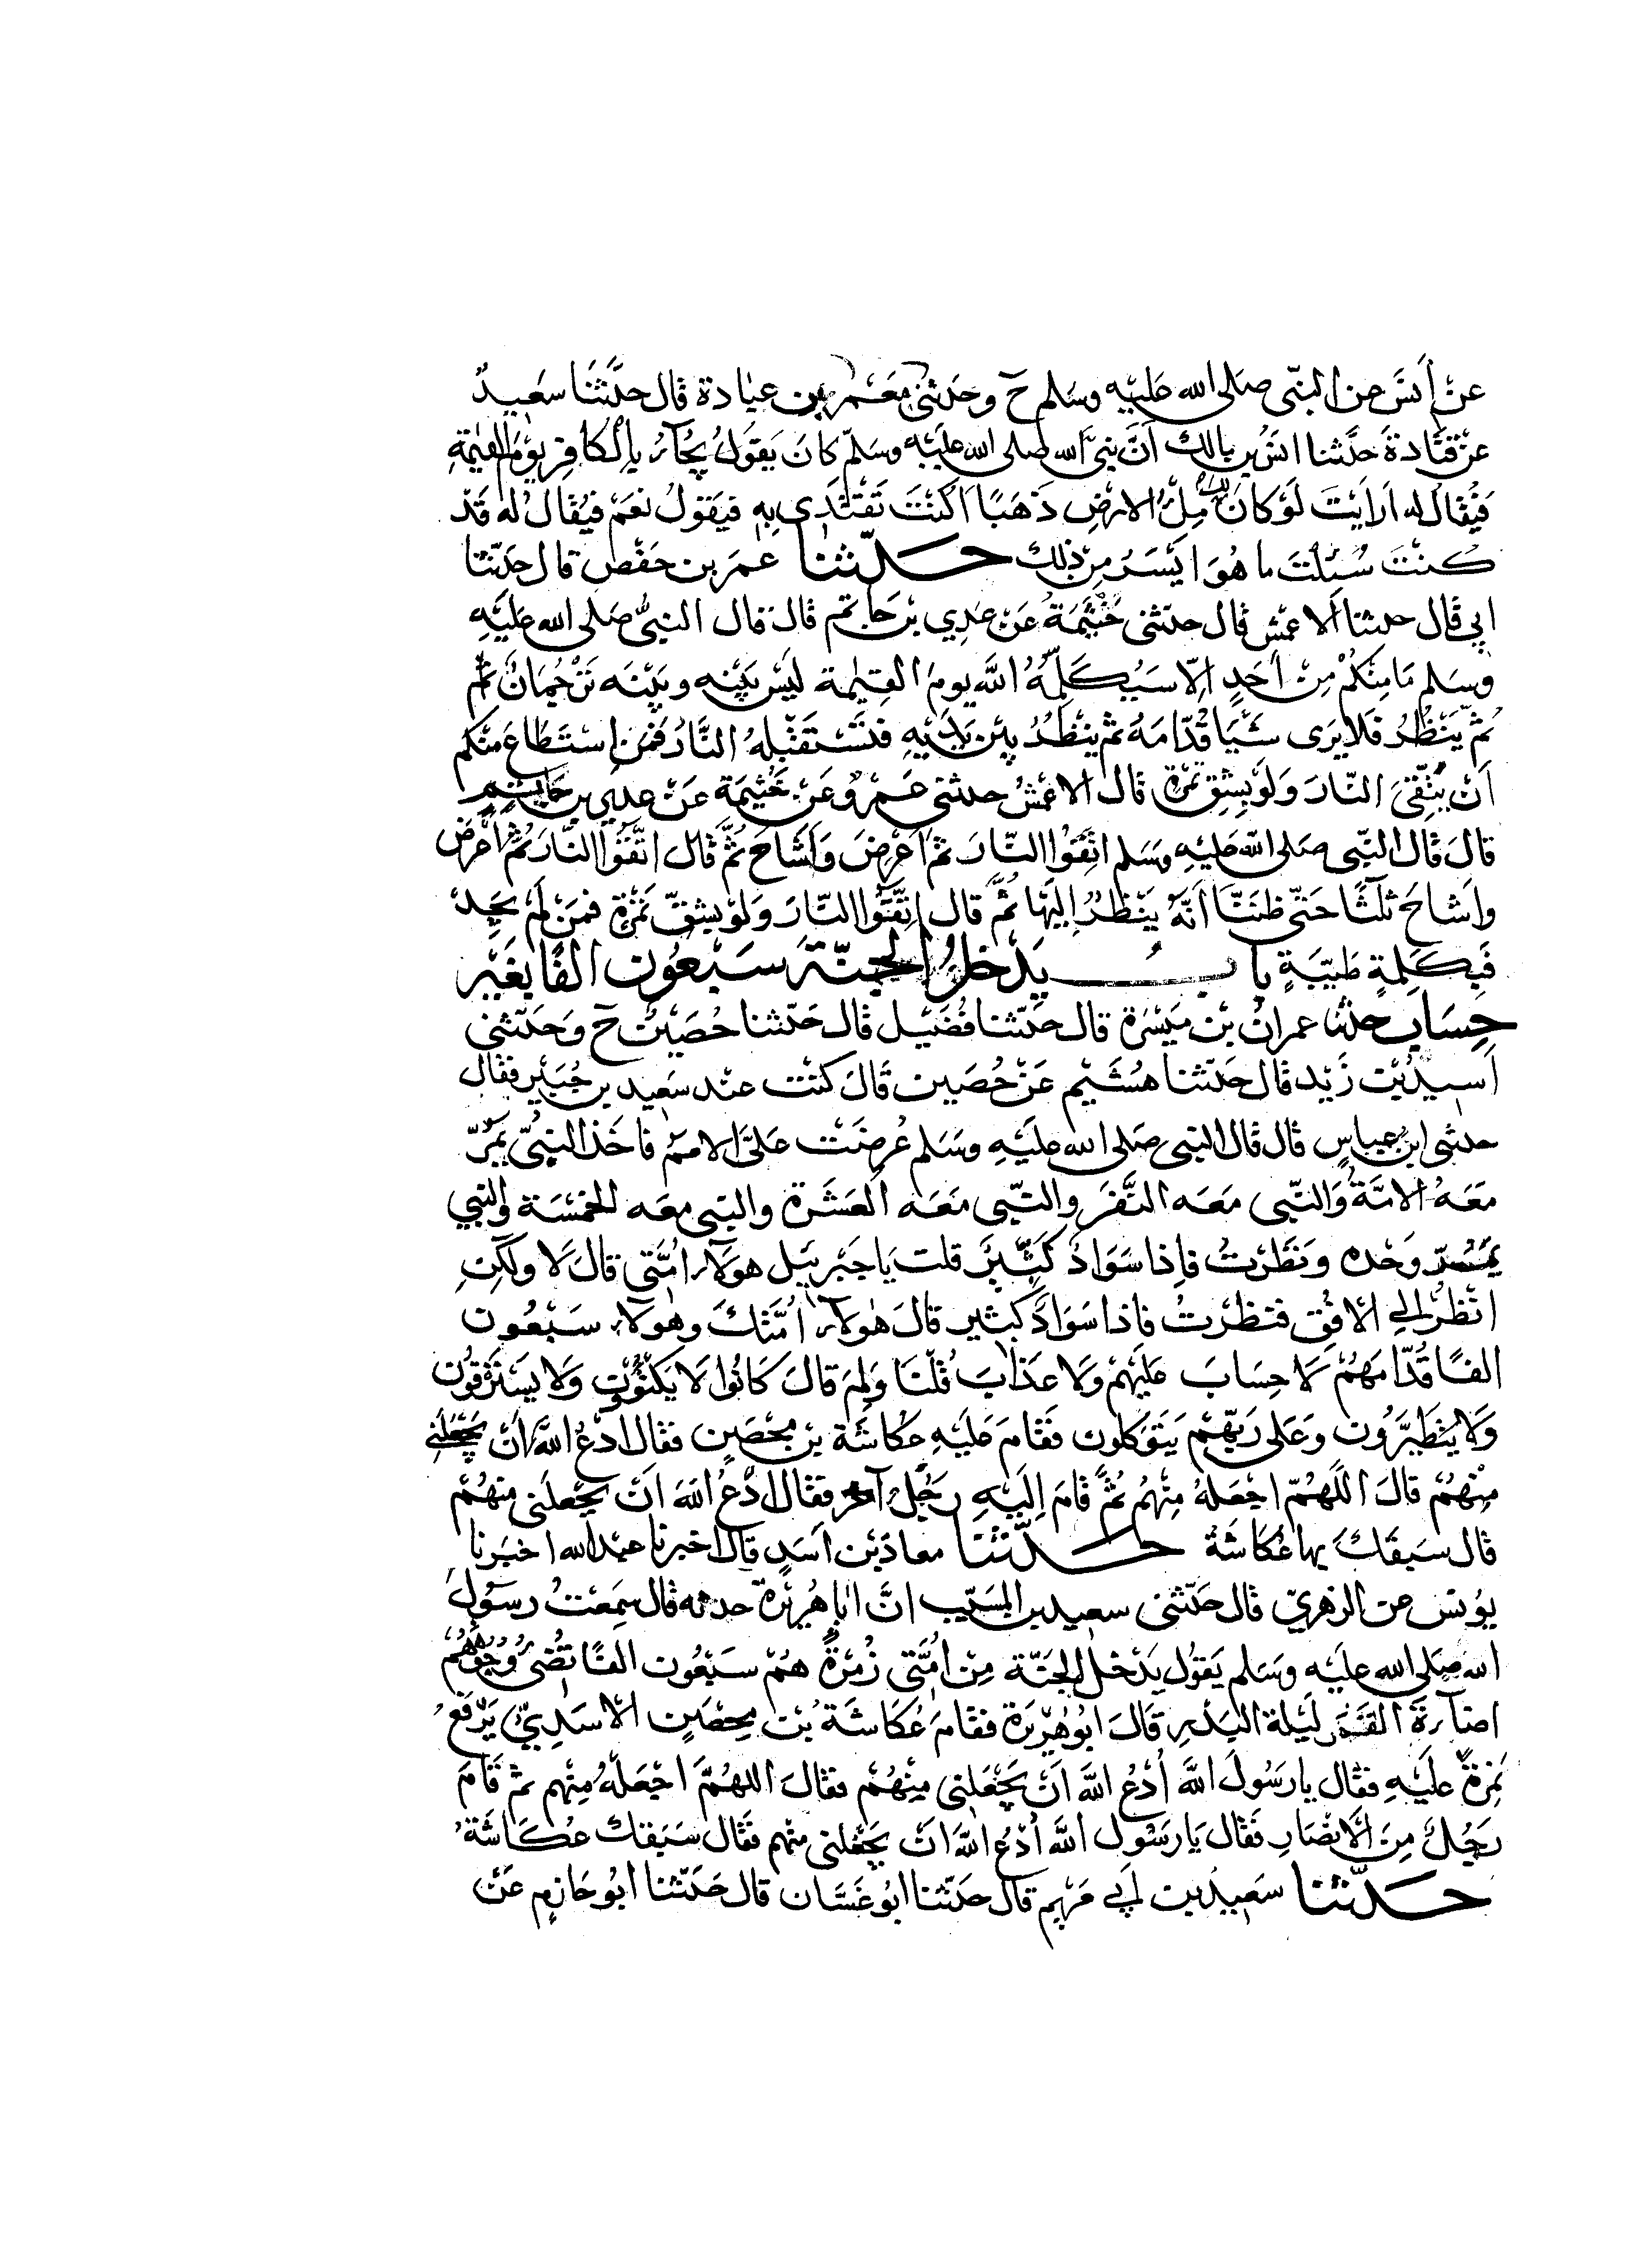

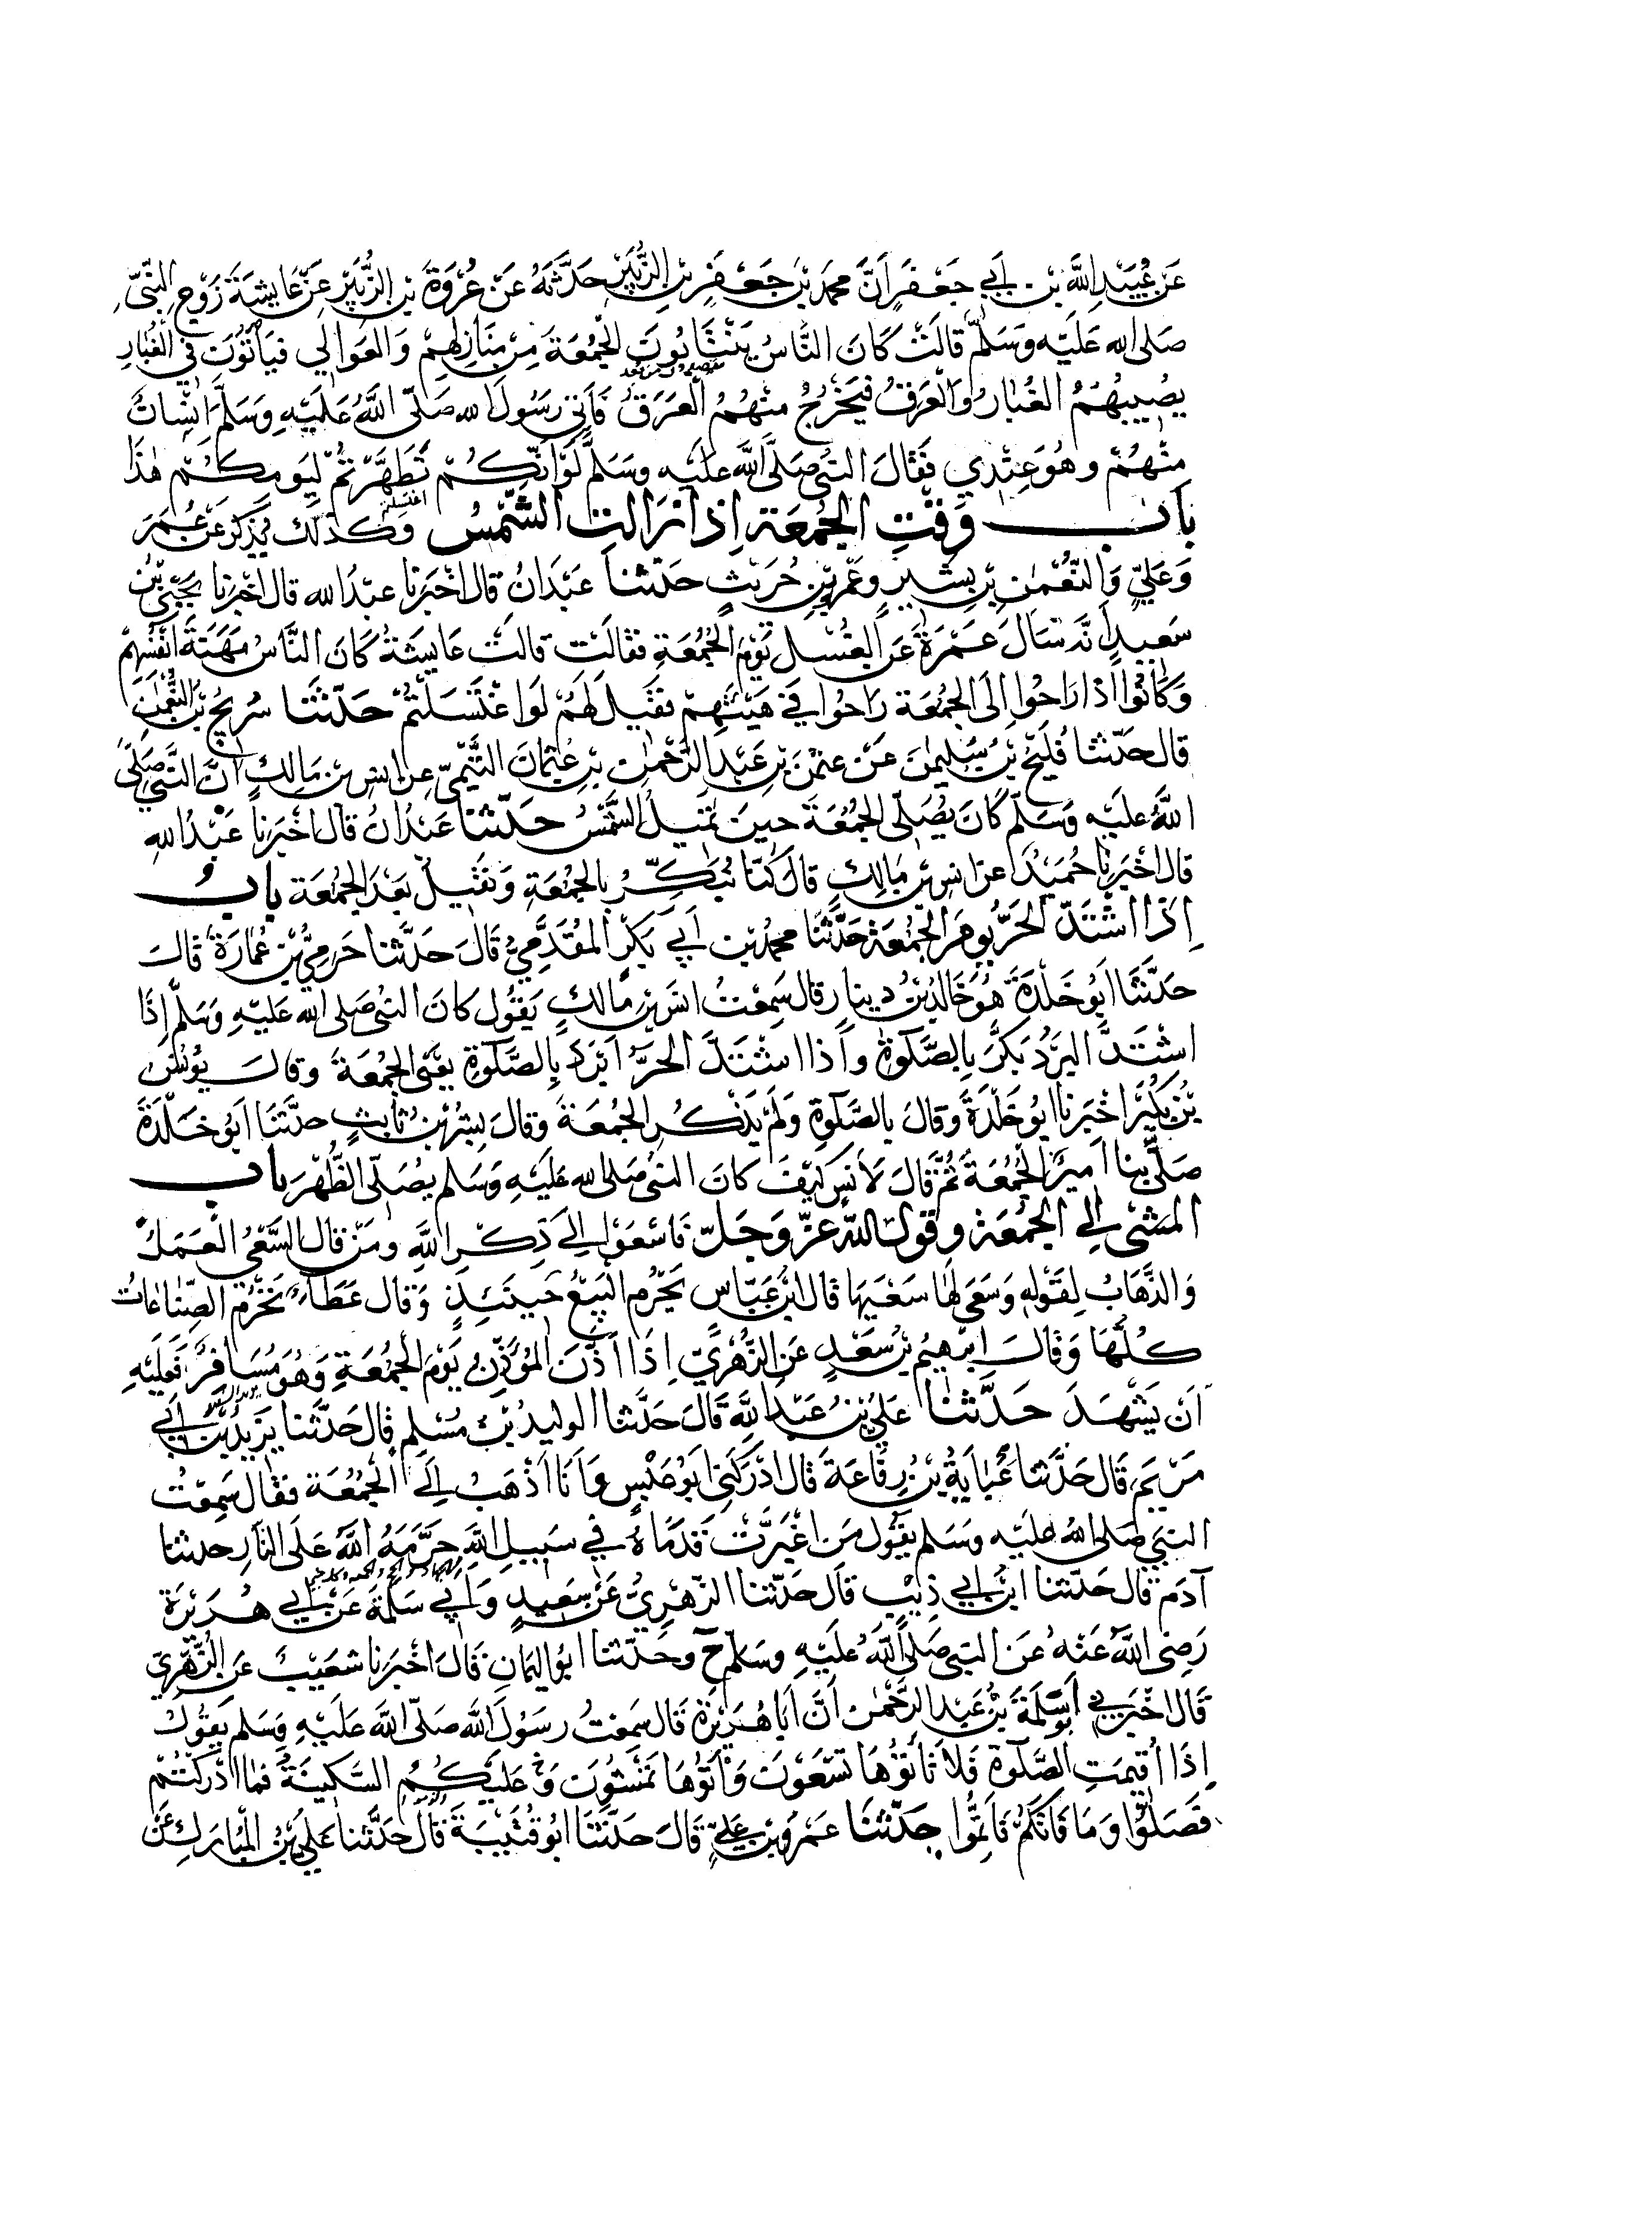

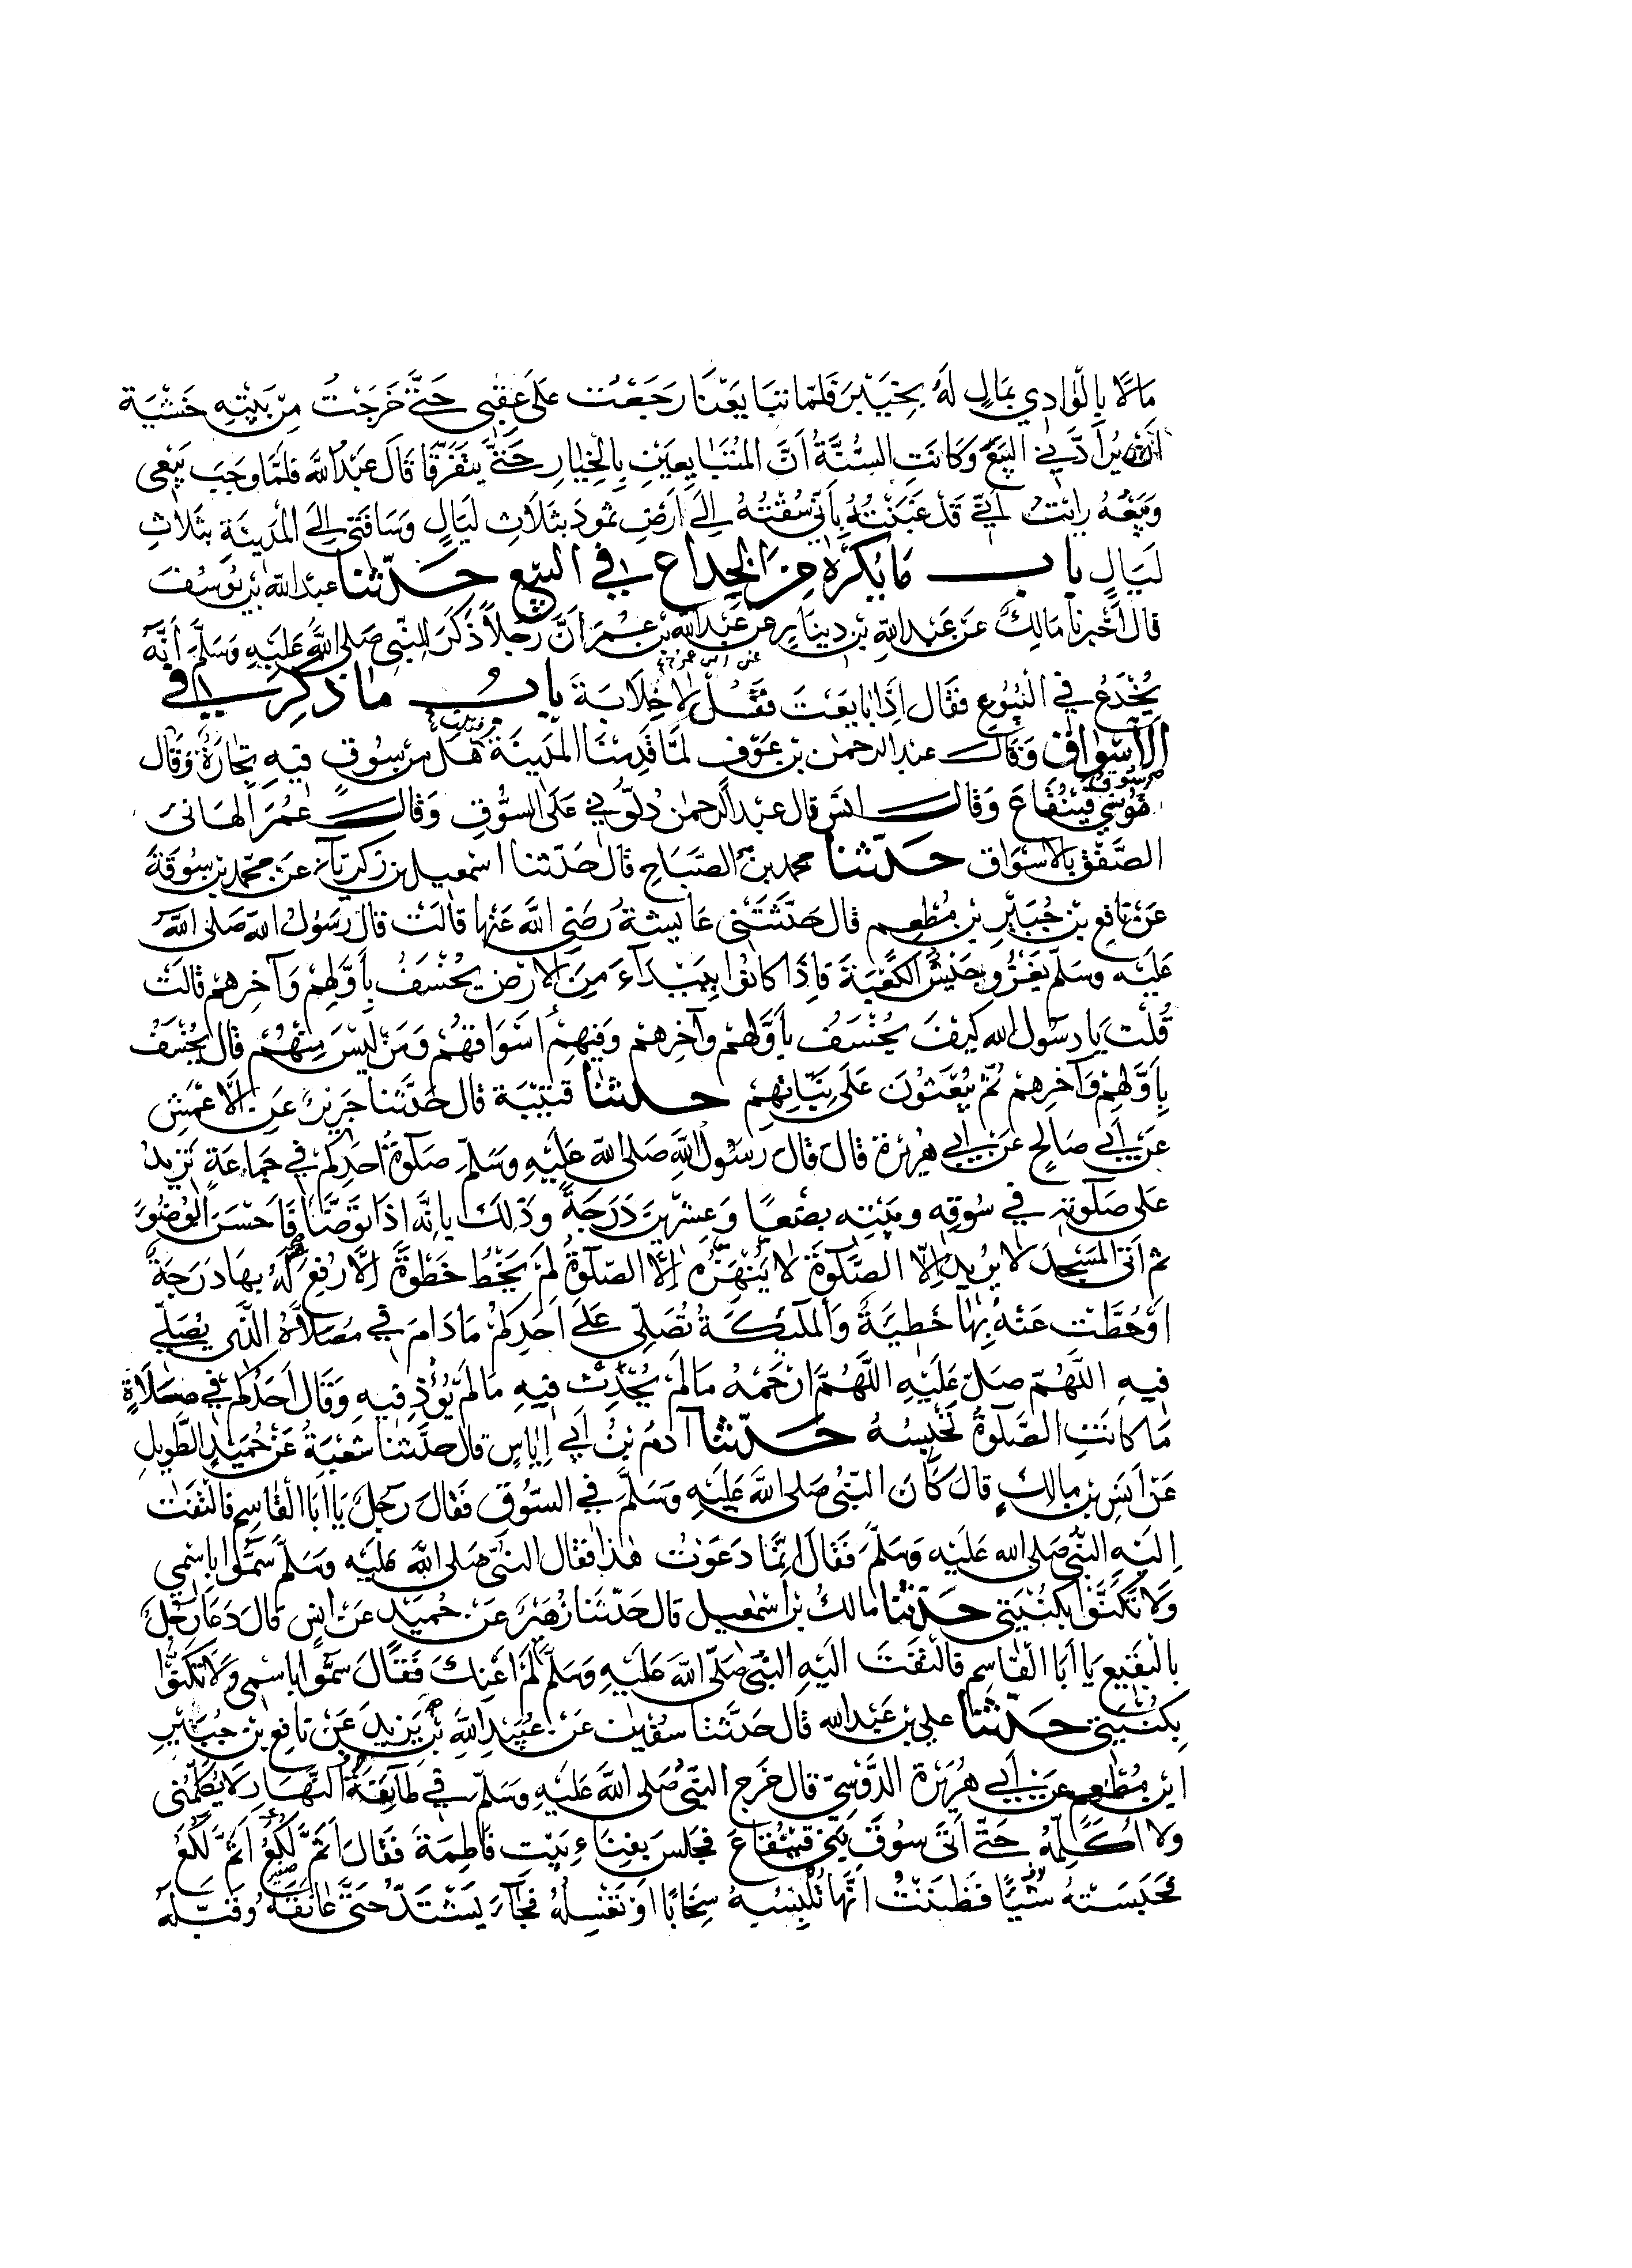

In [5]:
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(image3)

## **Save copies of images**

In [6]:
imgcpy1 = image1.copy()
imgcpy2=image2.copy()
imgcpy3=image3.copy()

# **images preprocessing and segmentation**

In [7]:
image1 = cv2.GaussianBlur(image1,(0,0), cv2.BORDER_REFLECT)
image2 = cv2.GaussianBlur(image2,(0,0), cv2.BORDER_REFLECT)
image3 = cv2.GaussianBlur(image3,(0,0), cv2.BORDER_REFLECT)

In [8]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

In [9]:
gray1 = np.array(255 * (gray1 / 255) ** 1 , dtype='uint8')
gray2 = np.array(255 * (gray2 / 255) ** 1 , dtype='uint8')
gray3 = np.array(255 * (gray3 / 255) ** 1 , dtype='uint8')

In [10]:
ret1,thresh1 = cv2.threshold(gray1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret2,thresh2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret3,thresh3 = cv2.threshold(gray3, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [11]:
cnts = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(thresh1, (x, y), (x + w, y + h), (0,0,0), -1)


cnts = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(thresh2, (x, y), (x + w, y + h), (0,0,0), -1)



cnts = cv2.findContours(thresh3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(thresh3, (x, y), (x + w, y + h), (0,0,0), -1)



In [12]:
def opening(thresh):
  open_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,1))
  open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, open_kernel, iterations=1)
  return open

def dilation(thresh):

  dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
  dilate = cv2.dilate(thresh, dilate_kernel, iterations=4)
  return dilate


In [13]:
# thresh1=removeNoisebByContours(thresh1,20)
# thresh2=removeNoisebByContours(thresh2,20)
# thresh3=removeNoisebByContours(thresh3,20)

open1=opening(thresh1)
open2=opening(thresh2)
open3=opening(thresh3)

dilate1=dilation(open1)
dilate2=dilation(open2)
dilate3=dilation(open3)


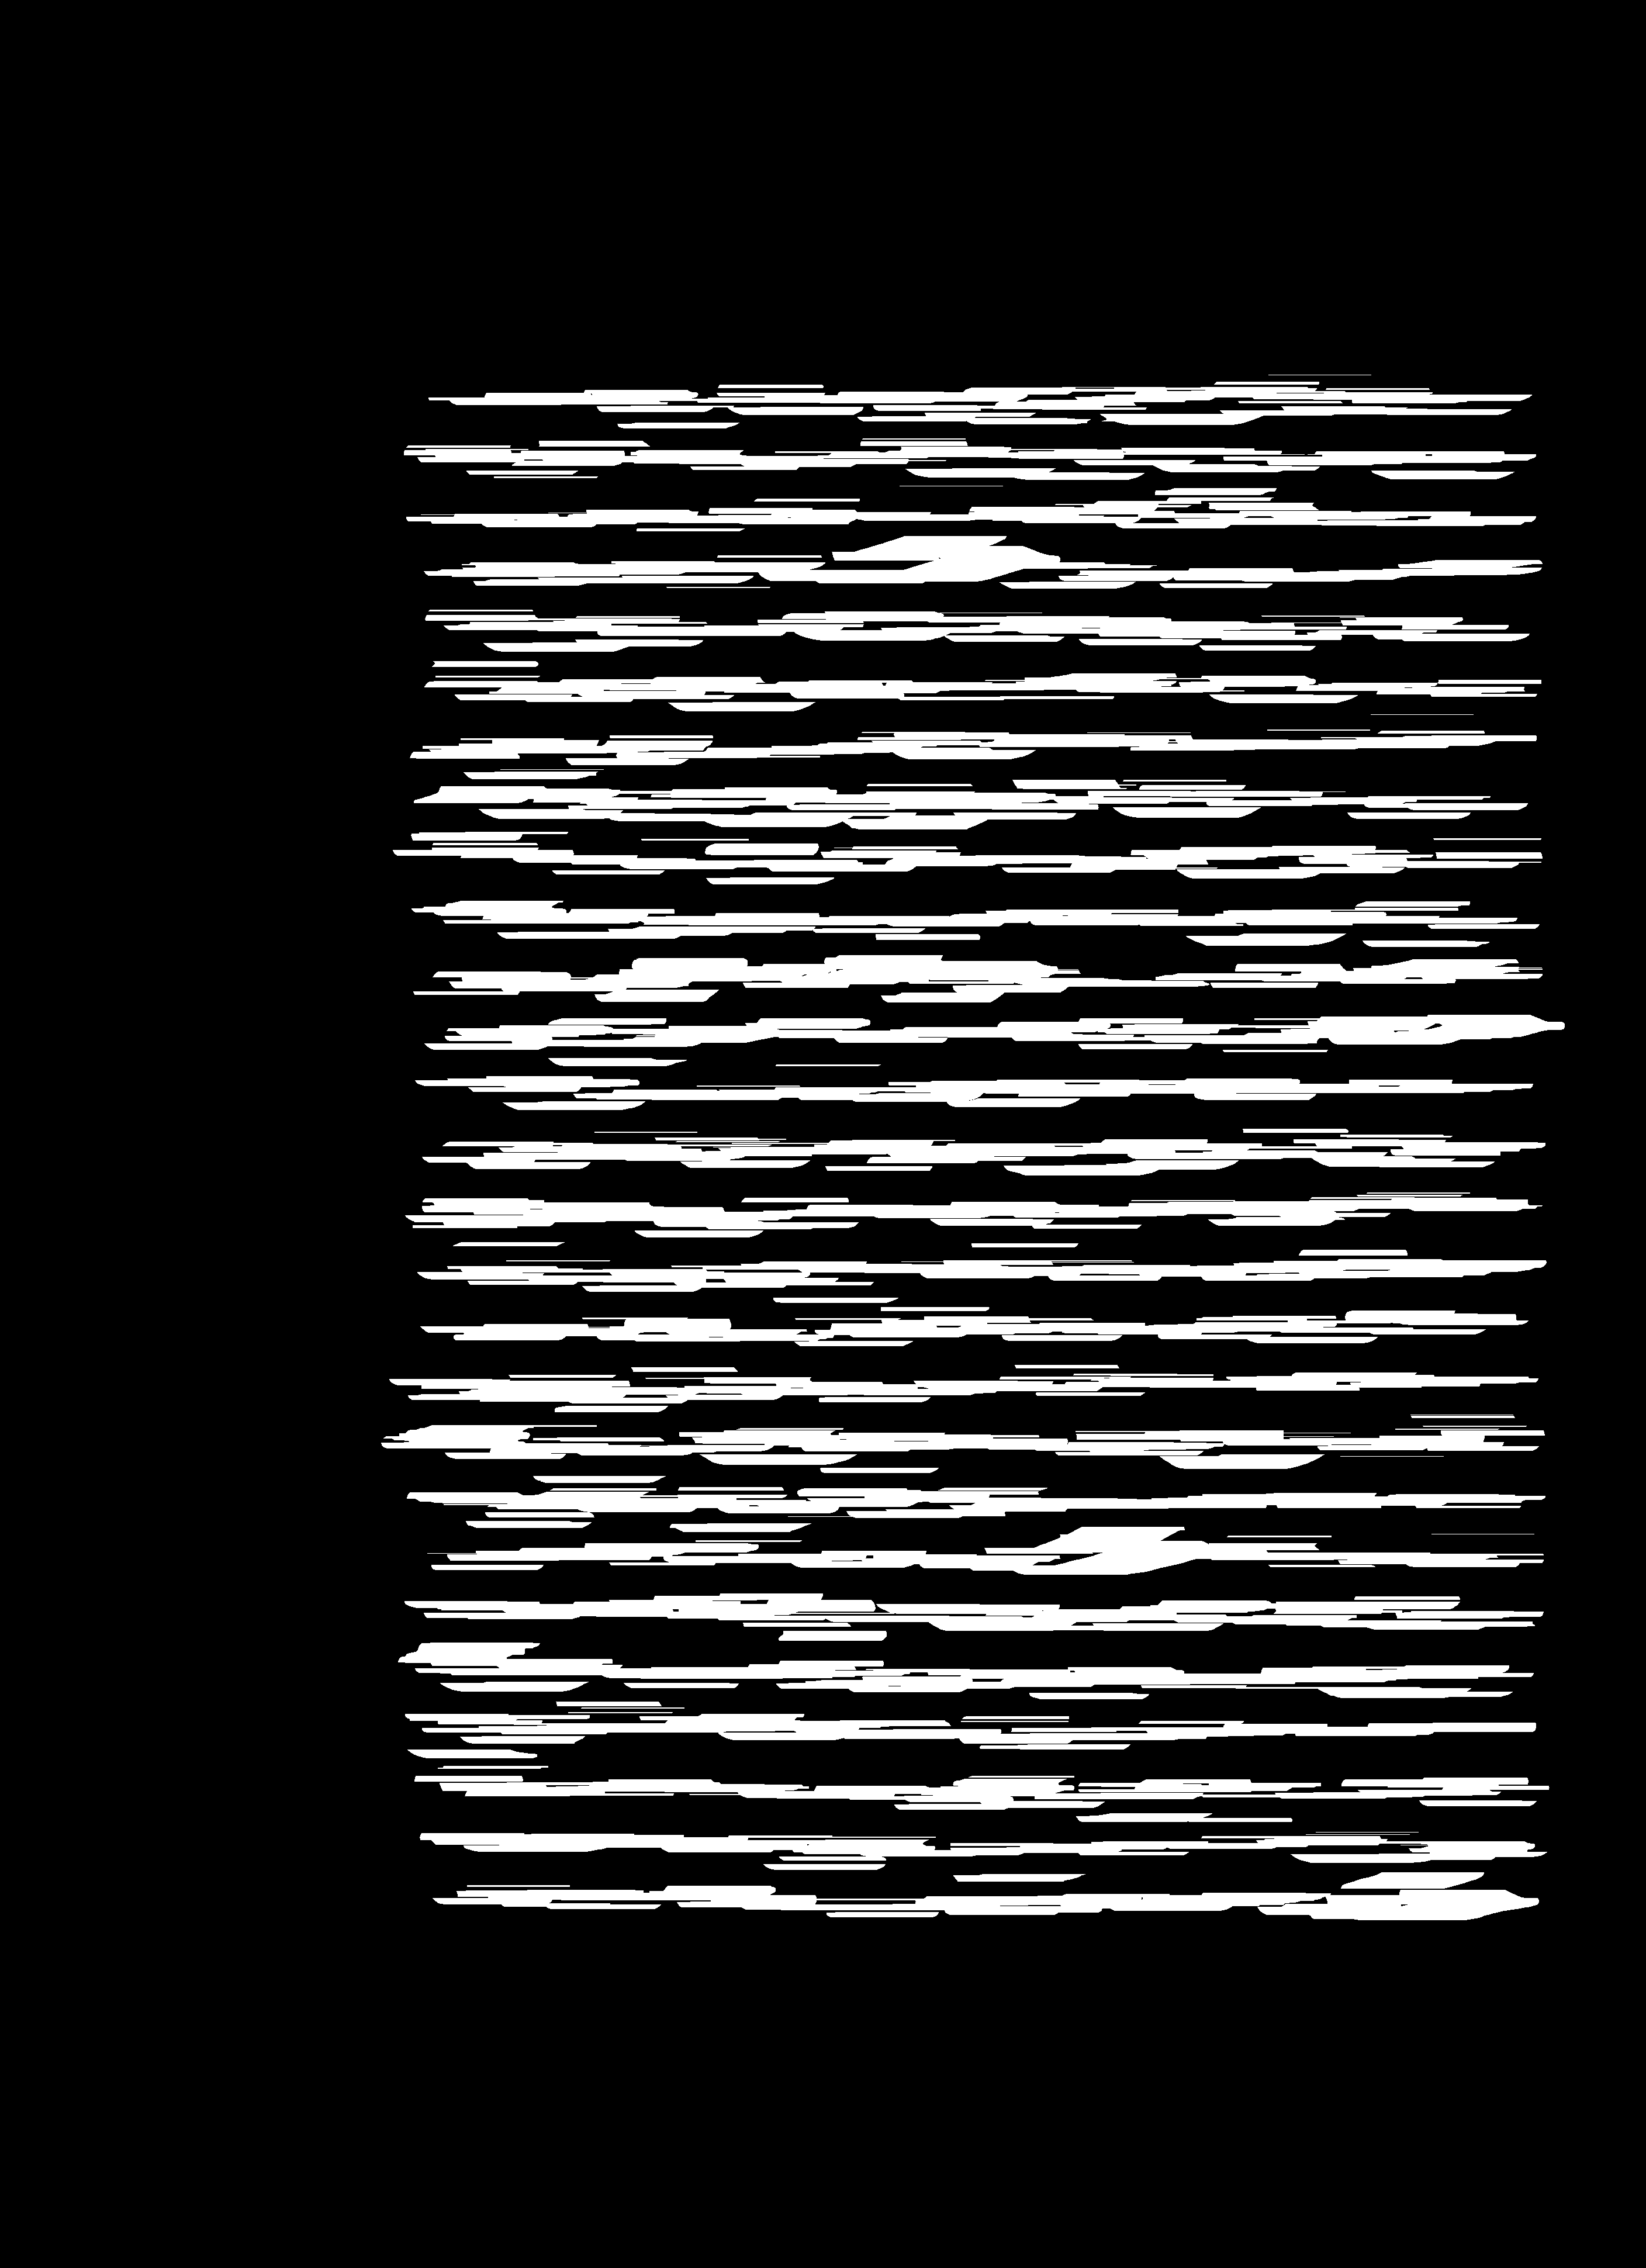

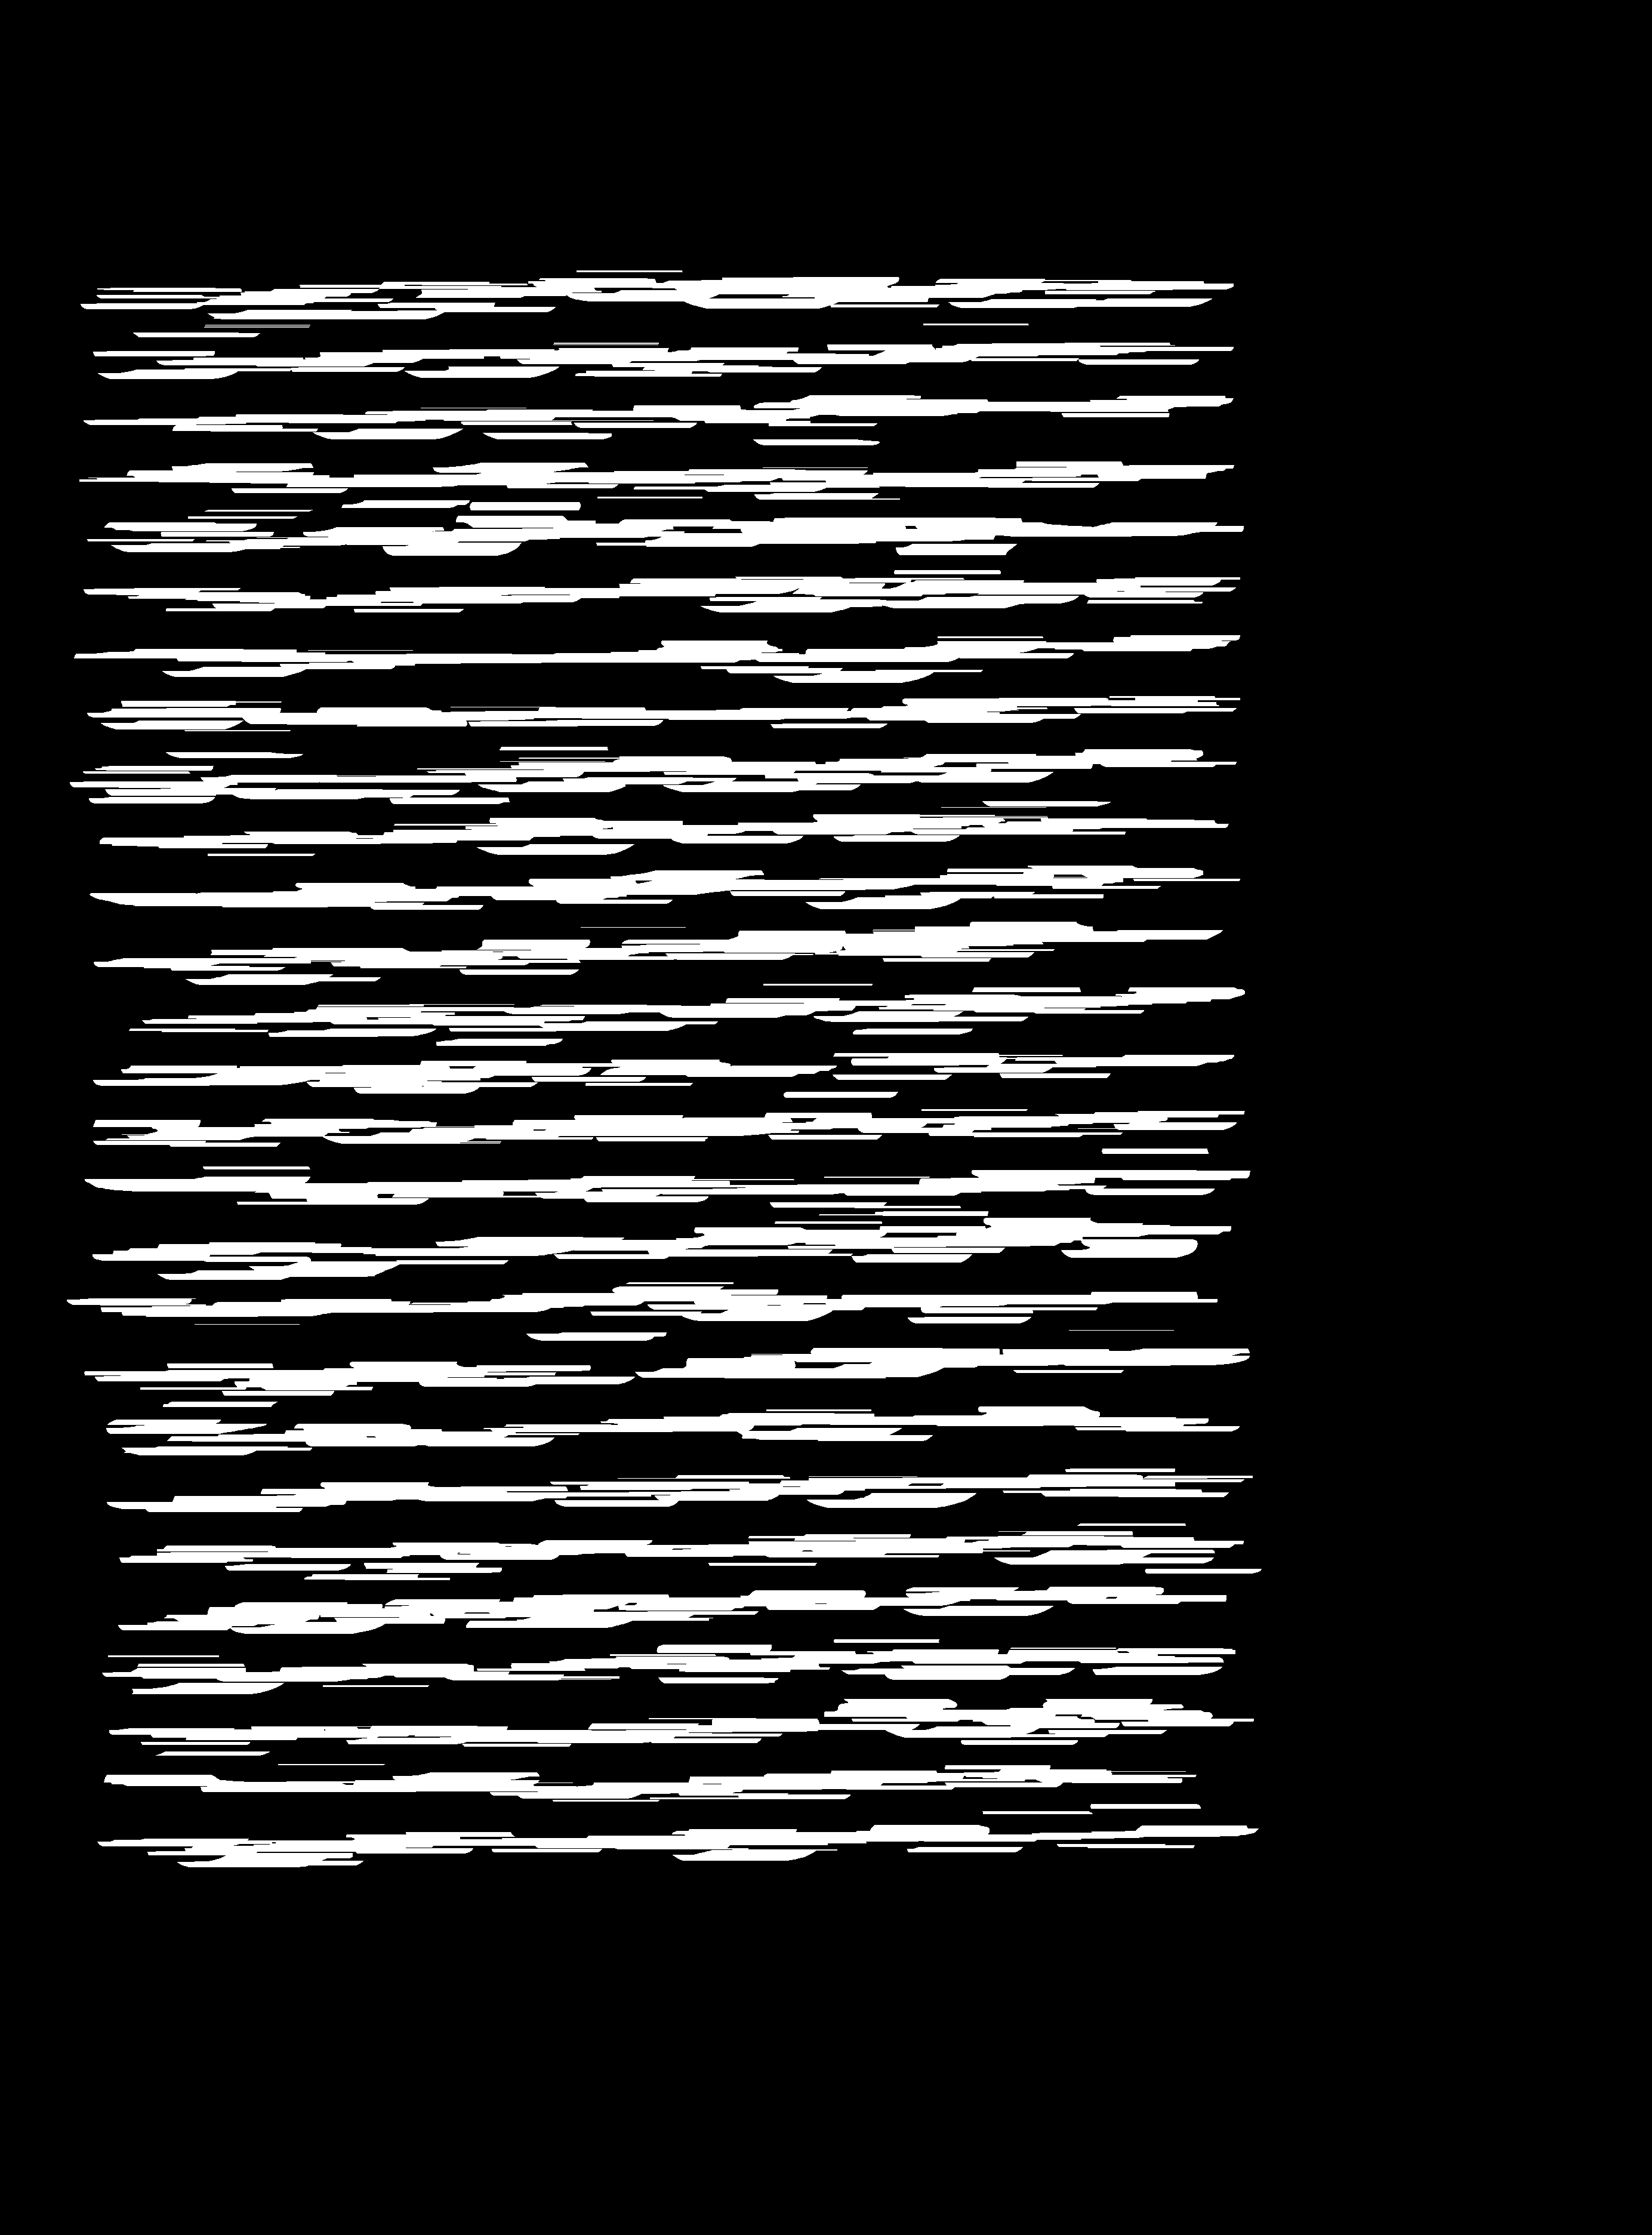

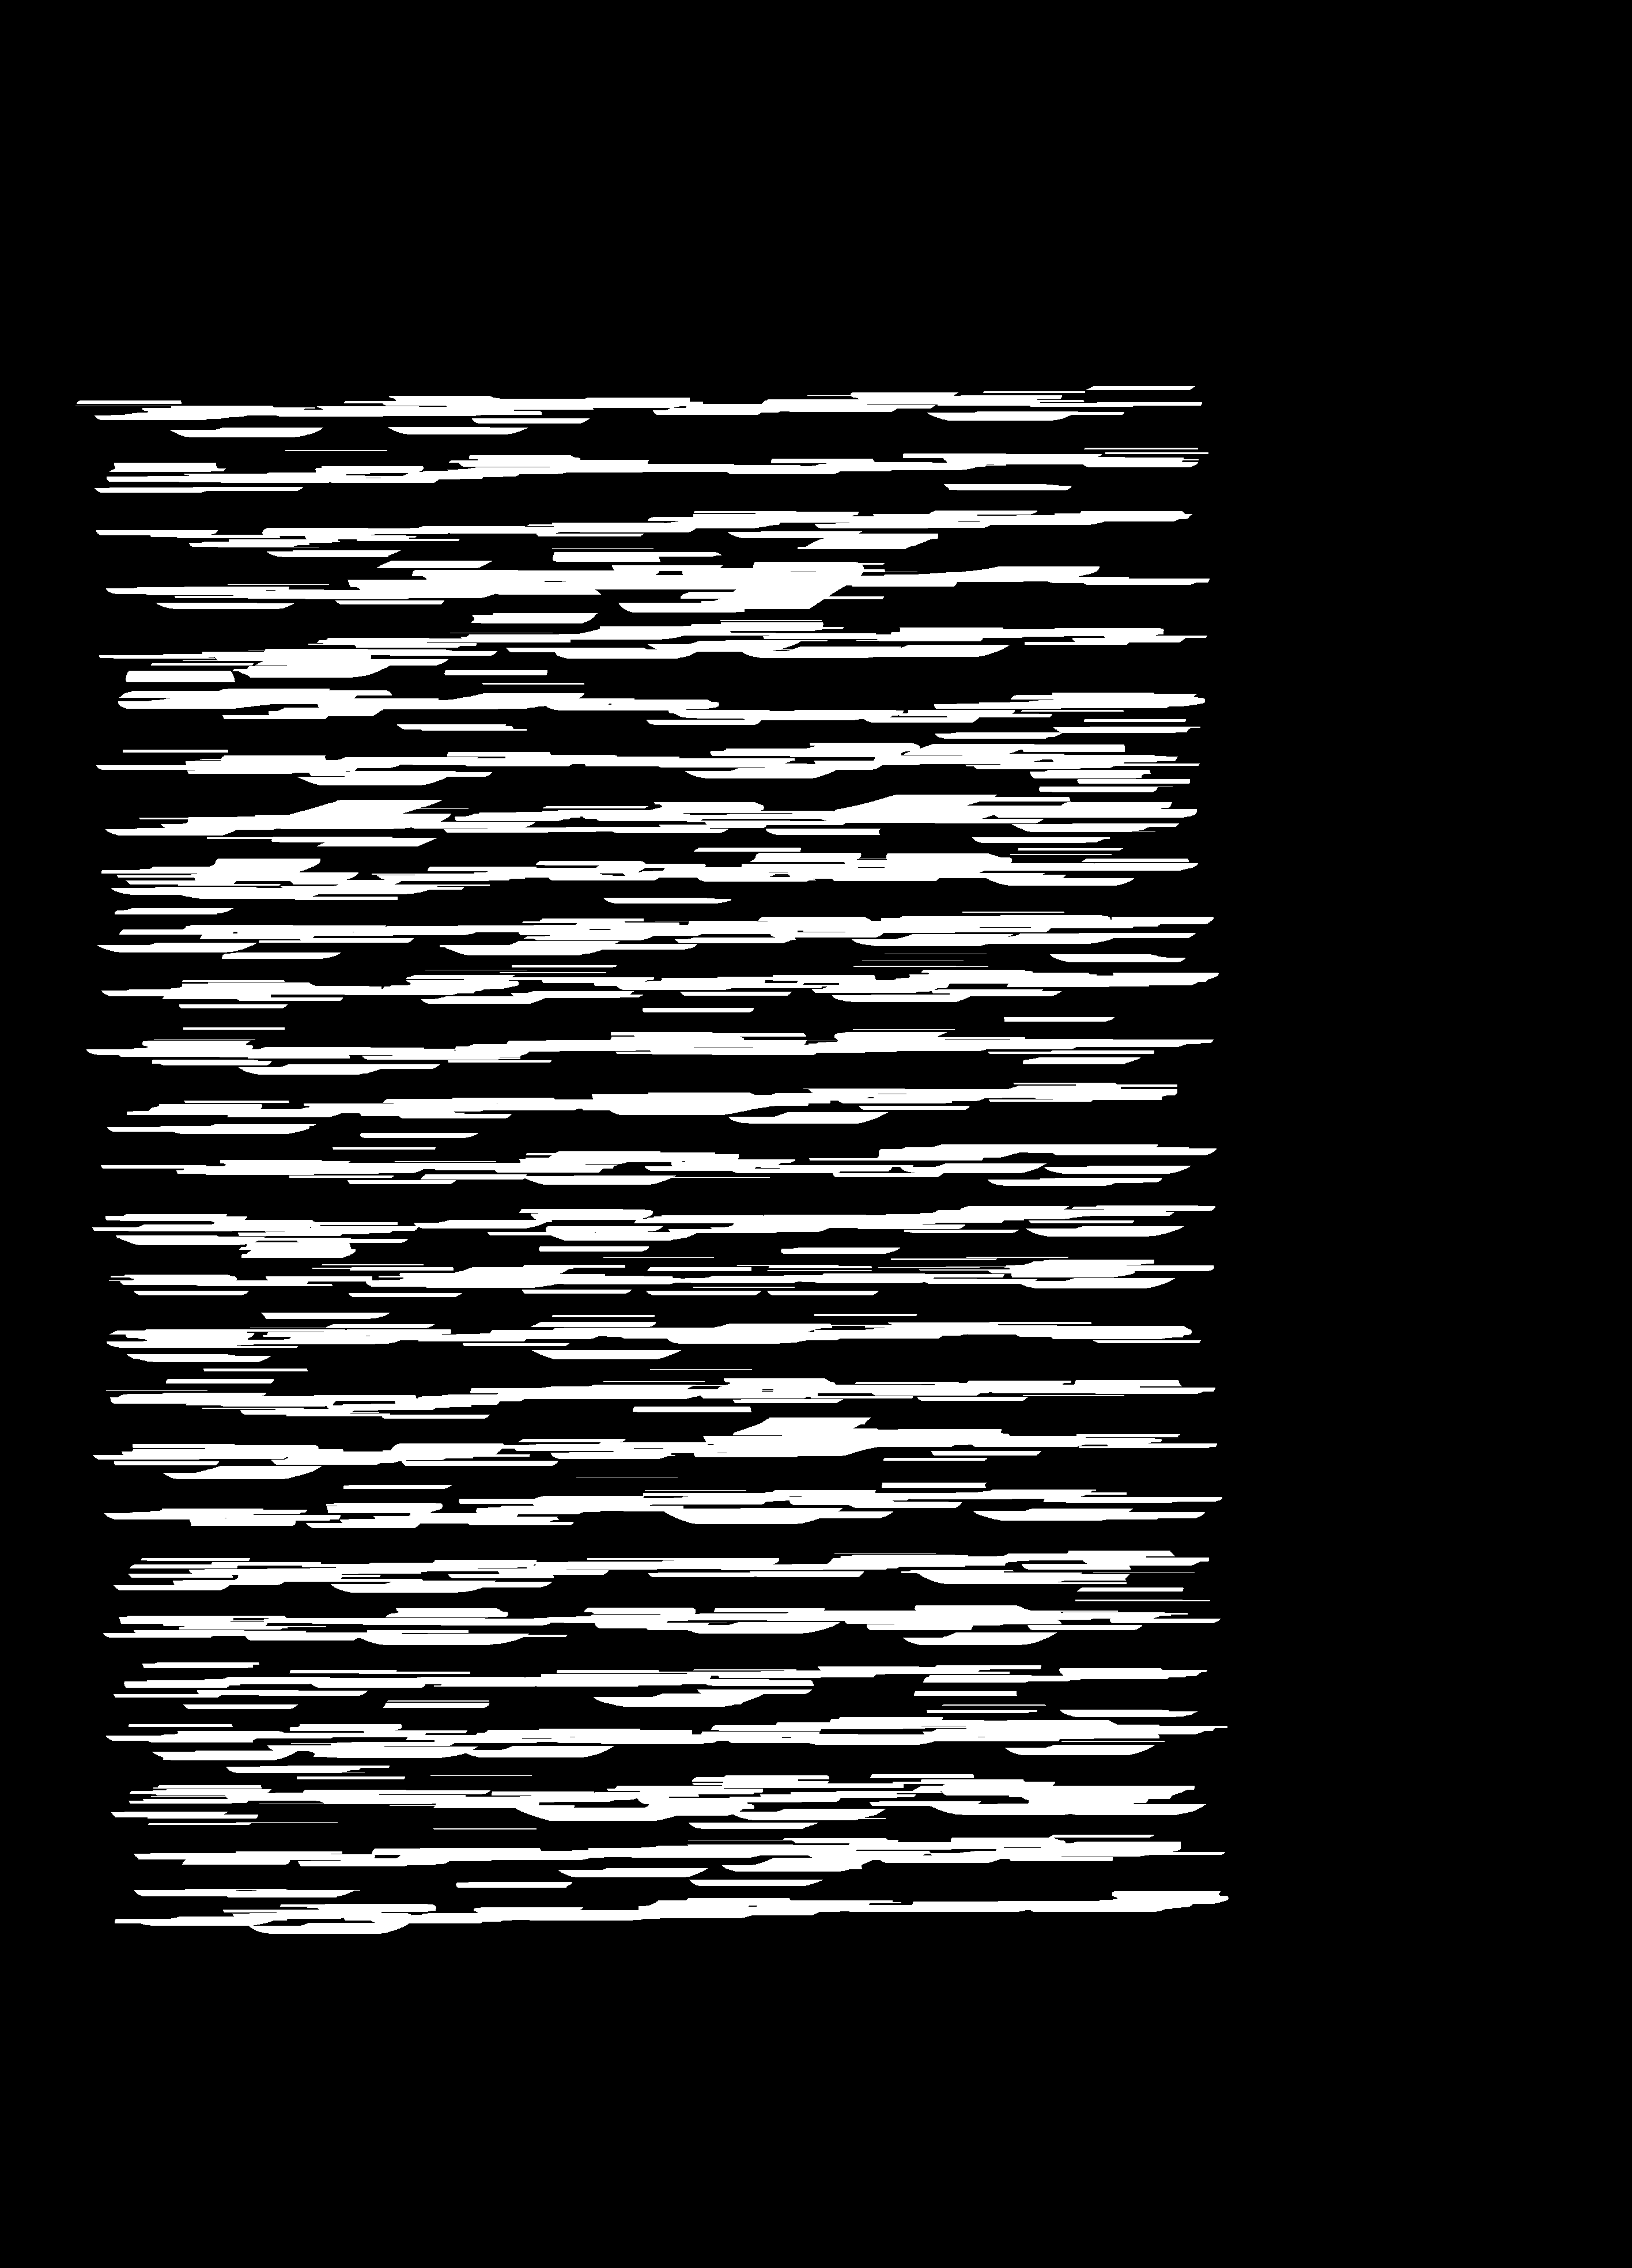

In [14]:
cv2_imshow(dilate1)
cv2_imshow(dilate2)
cv2_imshow(dilate3)

In [15]:
cnts = cv2.findContours(dilate1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 5000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(dilate1, (x, y), (x + w, y + h), (0,0,0), -1)


cnts = cv2.findContours(dilate2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 5000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(dilate2, (x, y), (x + w, y + h), (0,0,0), -1)



cnts = cv2.findContours(dilate3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 5000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(dilate3, (x, y), (x + w, y + h), (0,0,0), -1)

In [16]:
# dilate1=removeNoisebByContours(dilate1,5000)
# dilate2=removeNoisebByContours(dilate2,5000)
# dilate3=removeNoisebByContours(dilate3,5000)


blurr1=cv2.blur(dilate1, ksize=(40,10))
blurr2=cv2.blur(dilate2, ksize=(40,10))
blurr3=cv2.blur(dilate3, ksize=(40,10))

_,par_Text1 = cv2.threshold(blurr1,1,255,cv2.THRESH_BINARY)
_,par_Text2 = cv2.threshold(blurr2,1,255,cv2.THRESH_BINARY)
_,par_Text3 = cv2.threshold(blurr3,1,255,cv2.THRESH_BINARY)

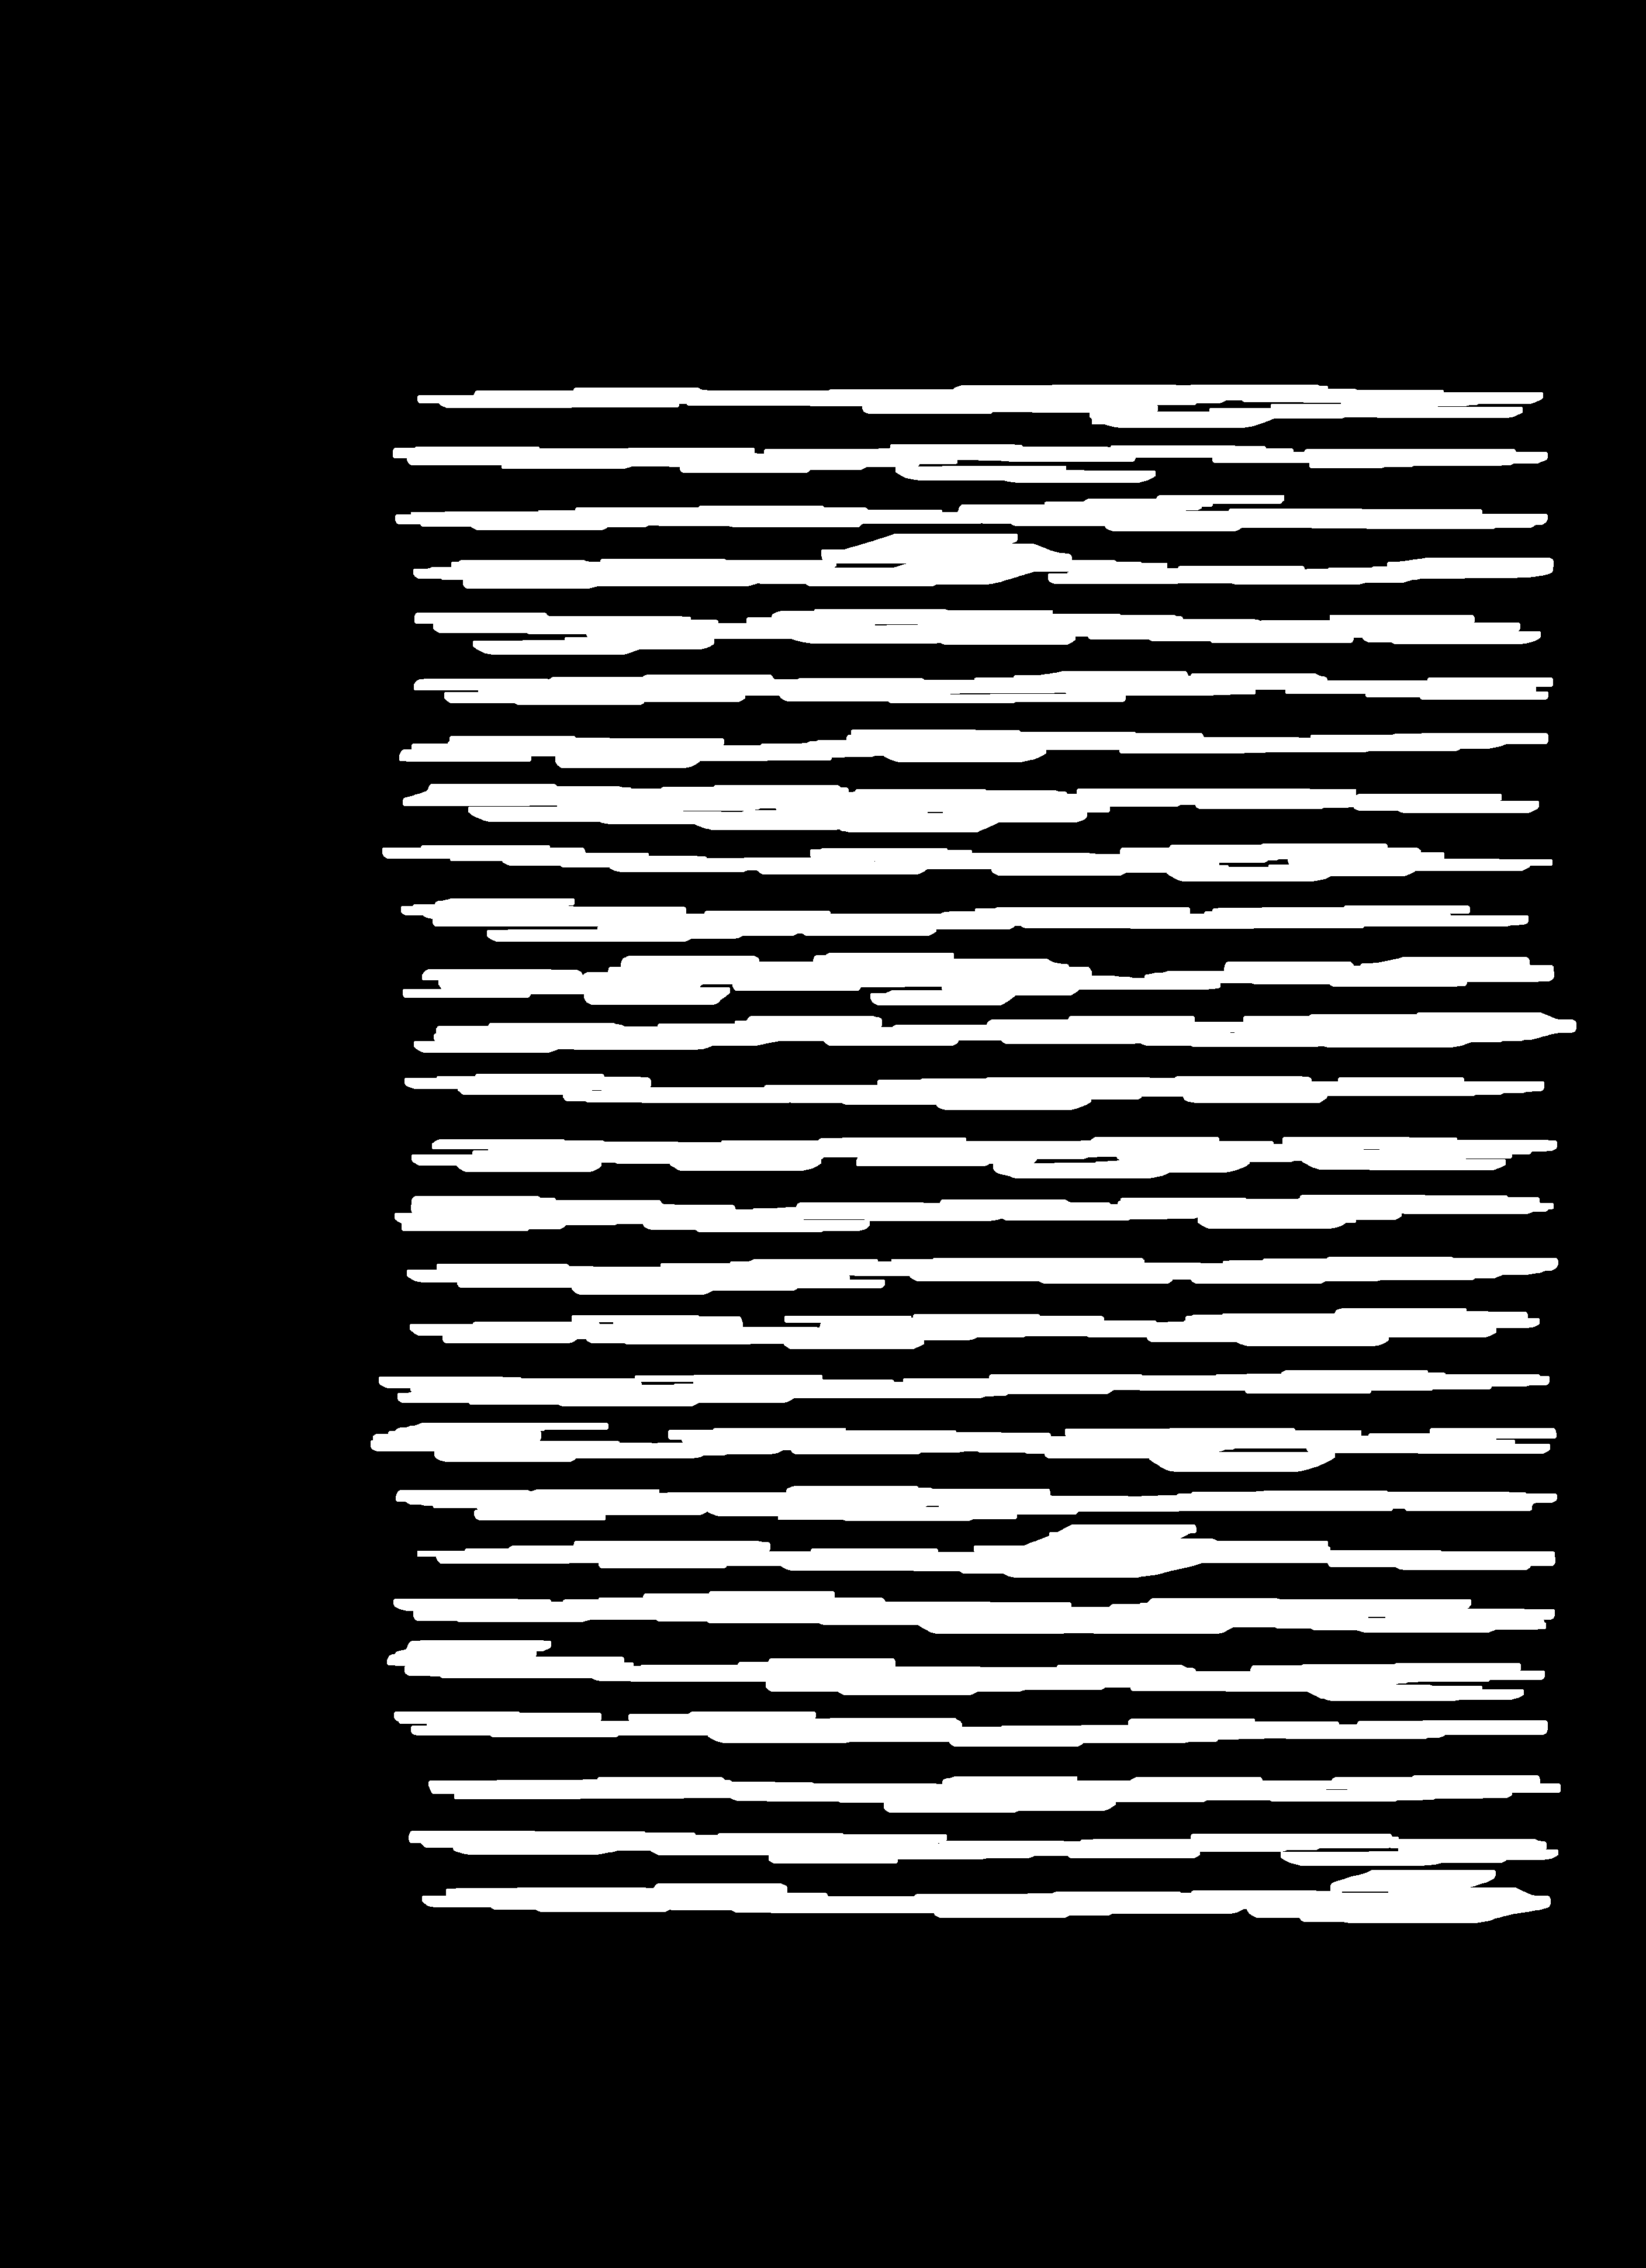

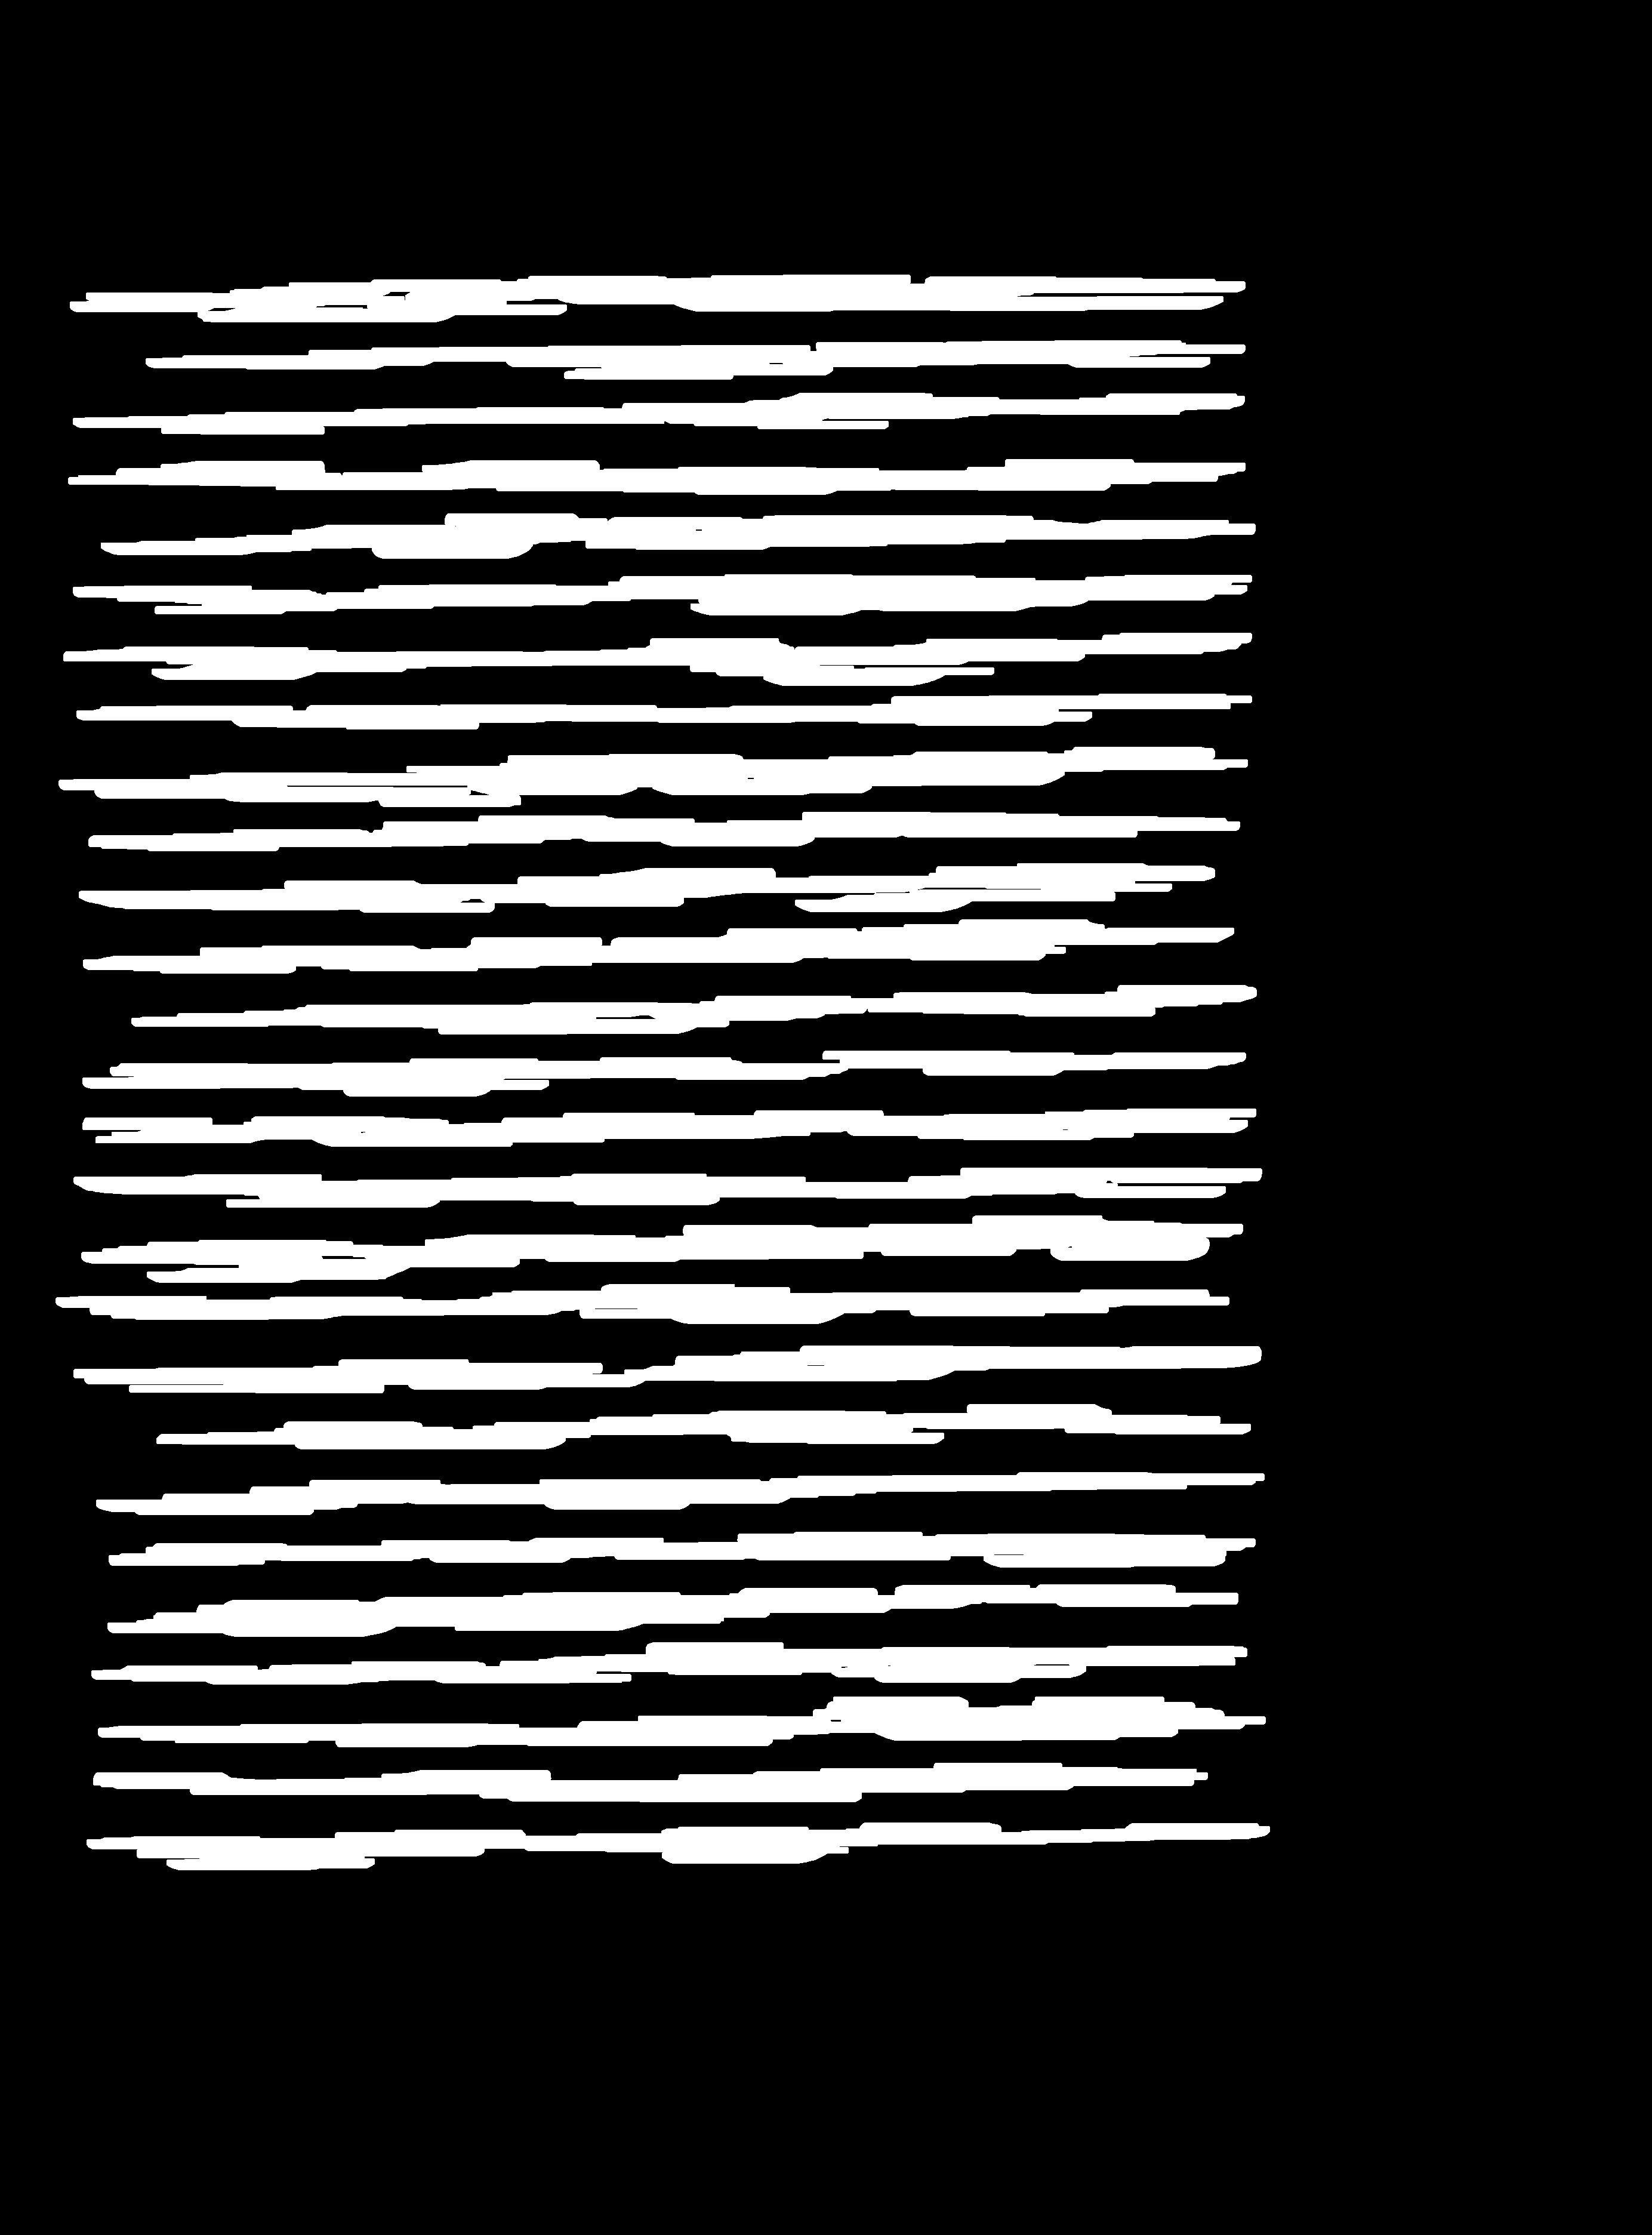

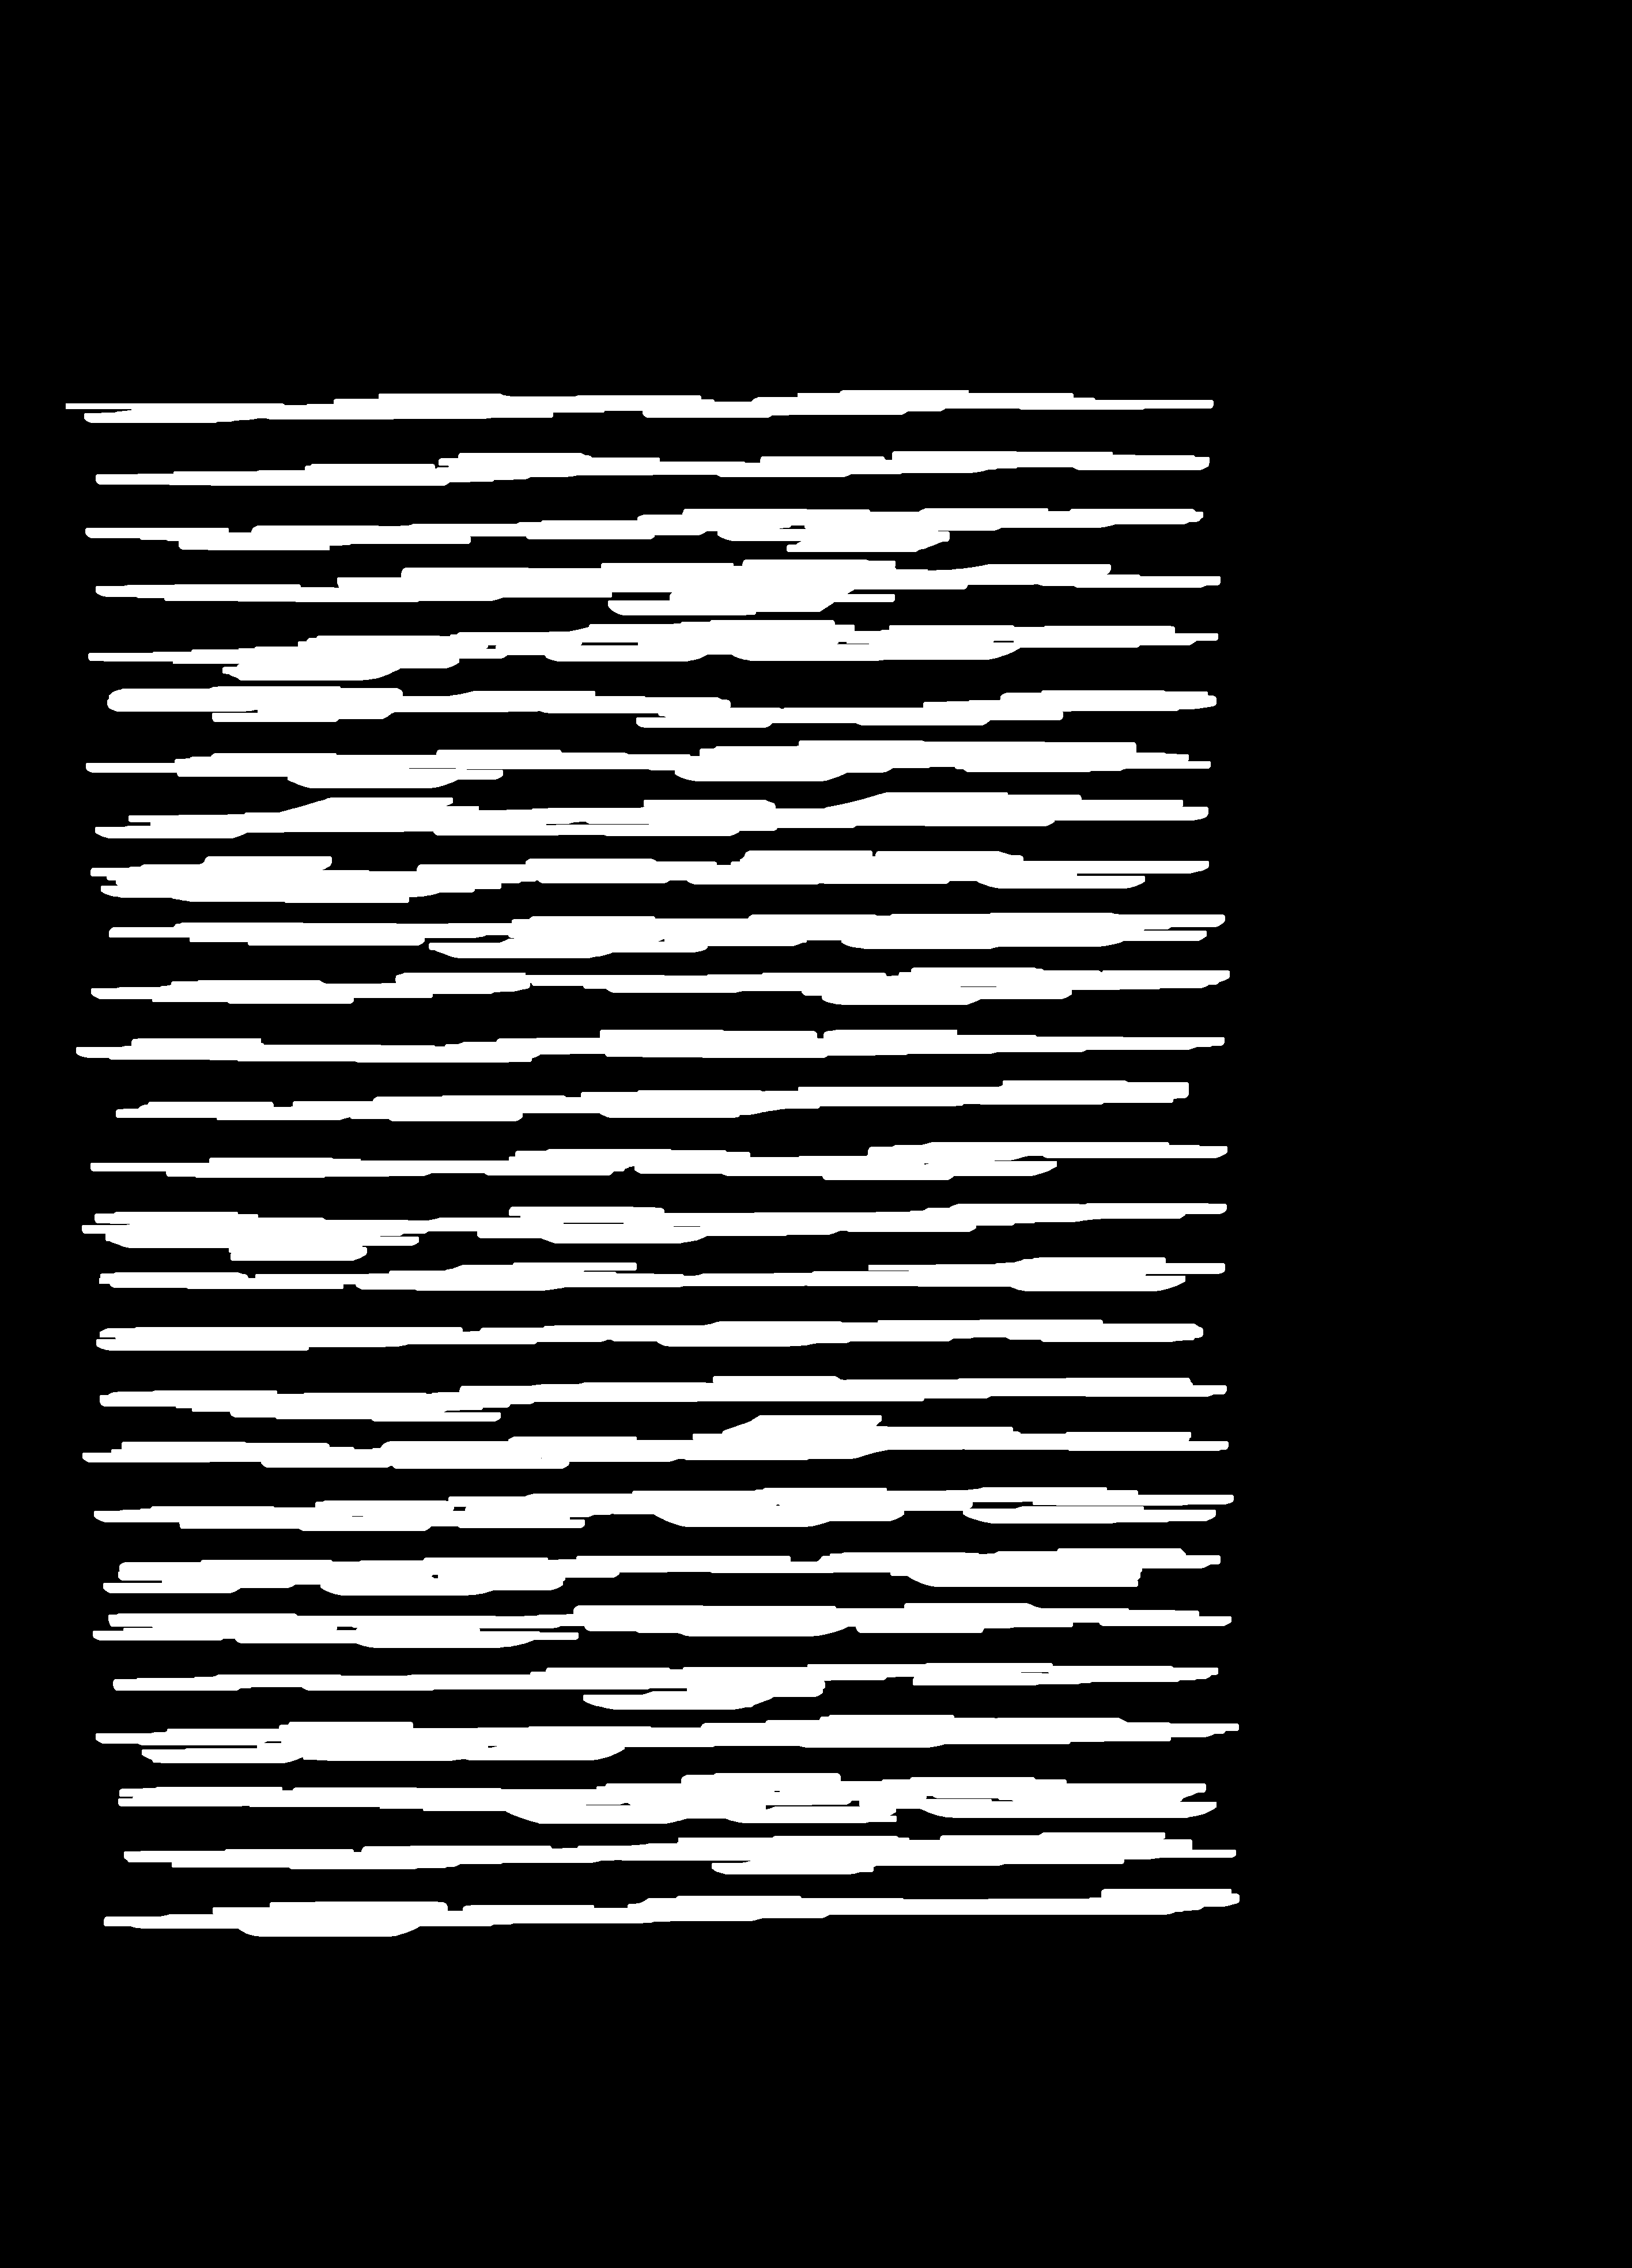

In [17]:
cv2_imshow(par_Text1)
cv2_imshow(par_Text2)
cv2_imshow(par_Text3)

In [18]:
def whiteBackground(img):
    img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    h,w=img.shape
    image = np.full((h, w, 3), (255,255,255), np.uint8)
    return image

In [19]:
imWhite1=whiteBackground("drive/My Drive/image.png")
imWhite11=whiteBackground("drive/My Drive/image.png")

imWhite2=whiteBackground("drive/My Drive/image2.png")
imWhite22=whiteBackground("drive/My Drive/image2.png")
imWhite3=whiteBackground("drive/My Drive/image3.png")
imWhite33=whiteBackground("drive/My Drive/image3.png")

# **Draw Lines Counter:**

In [20]:
def DrawLinesCounter(par_Text,imWhite,imWhite2):

  (contText, _) = cv2.findContours(par_Text, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  i=0
  f=0
  f2=0
  for c in contText:


    #cnt_scaled = scale_contour(c, 1.3)
    area=cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)

    if area > 5000:

      i+=1
      #cv2.rectangle(imWhite2, (x, y), (x + w, y + h), (0, 0, 255), -1)
      X =x-20;Y=y- 20

      if i % 10 == 0:
          cv2.drawContours(imWhite, [c], -1, (255, 255, 100), -1)
          #cv2.drawContours(imWhite1, [cnt_scaled], 0, (255, 255, 100), -1)
          cv2.rectangle(imWhite2, (X, Y), (x + w, y + h), (255, 255, 100), -1)
      elif i % 9 == 0:
            cv2.drawContours(imWhite, [c], -1, (0, 255, 255), -1)
            #cv2.drawContours(imWhite1, [cnt_scaled], 0, (0, 255, 255), -1)
            cv2.rectangle(imWhite2, (X, Y), (x + w, y + h), (0, 255, 255), -1)
      elif i % 8 == 0:
            cv2.drawContours(imWhite, [c], -1, (255, 0, 255), -1)
            #cv2.drawContours(imWhite1, [cnt_scaled], 0, (255, 0, 255), -1)
            cv2.rectangle(imWhite2, (X, Y), (x + w, y + h), (255, 0, 255), -1)

      elif i % 7 == 0:
            cv2.drawContours(imWhite, [c], -1, (0, 255, 0), -1)
            #cv2.drawContours(imWhite1, [cnt_scaled], 0, (0, 255, 0), -1)
            cv2.rectangle(imWhite2,(X, Y), (x + w, y + h), (0, 255, 0), -1)
      elif i % 6 == 0:
            cv2.drawContours(imWhite, [c], -1, (1, 1, 1), -1)
            #cv2.drawContours(imWhite1, [cnt_scaled], 0, (1, 1, 1), -1)
            cv2.rectangle(imWhite2, (X, Y), (x + w, y + h),  (1, 1, 1), -1)

      elif i % 5 == 0:
            cv2.drawContours(imWhite, [c], -1, (0, 0, 255), -1)
            #cv2.drawContours(imWhite1, [cnt_scaled], 0, (0, 0, 255), -1)
            cv2.rectangle(imWhite2,(X, Y), (x + w, y + h),  (0, 0, 255), -1)

      elif i % 4 == 0:
            cv2.drawContours(imWhite, [c], -1, (255, 0, 0), -1)
            #cv2.drawContours(imWhite1, [cnt_scaled], 0, (255, 0, 0), -1)
            cv2.rectangle(imWhite2, (X, Y), (x + w, y + h), (255, 0, 0), -1)

      elif i % 3 == 0:
            cv2.drawContours(imWhite, [c], -1, (120, 120, 120), -1)
            #cv2.drawContours(imWhite1, [cnt_scaled], 0, (120, 120, 120), -1)
            cv2.rectangle(imWhite2, (X, Y), (x + w , y + h ), (120, 120,120), -1)

      else:
            if f==0:
                cv2.drawContours(imWhite, [c], -1, (0, 100, 255), -1)
                #cv2.drawContours(imWhite1, [cnt_scaled], 0, (0, 100, 255), -1)
                cv2.rectangle(imWhite2,(X, Y), (x + w, y + h),(0, 100, 255), -1)
                f=1
            elif f==1 and f2==0:
                cv2.drawContours(imWhite, [c], -1, (0, 185, 185), -1)
                #cv2.drawContours(imWhite1, [cnt_scaled], 0, (0, 185, 185), -1)
                cv2.rectangle(imWhite2, (X, Y), (x + w , y + h ), (0, 185, 185), -1)
                f = 0
                f2=1
            else:
                cv2.drawContours(imWhite, [c], -1, (0, 70, 120), -1)
               # cv2.drawContours(imWhite1, [cnt_scaled], 0, (0, 70, 120), -1)
                cv2.rectangle(imWhite2,(X, Y), (x + w , y + h ), (0, 70, 120), -1)
                f2=0


  return imWhite,imWhite2

In [21]:
CounterImage1,RecImage1=DrawLinesCounter(par_Text1,imWhite1,imWhite11)
CounterImage2,RecImage2=DrawLinesCounter(par_Text2,imWhite2,imWhite22)
CounterImage3,RecImage3=DrawLinesCounter(par_Text3,imWhite3,imWhite33)

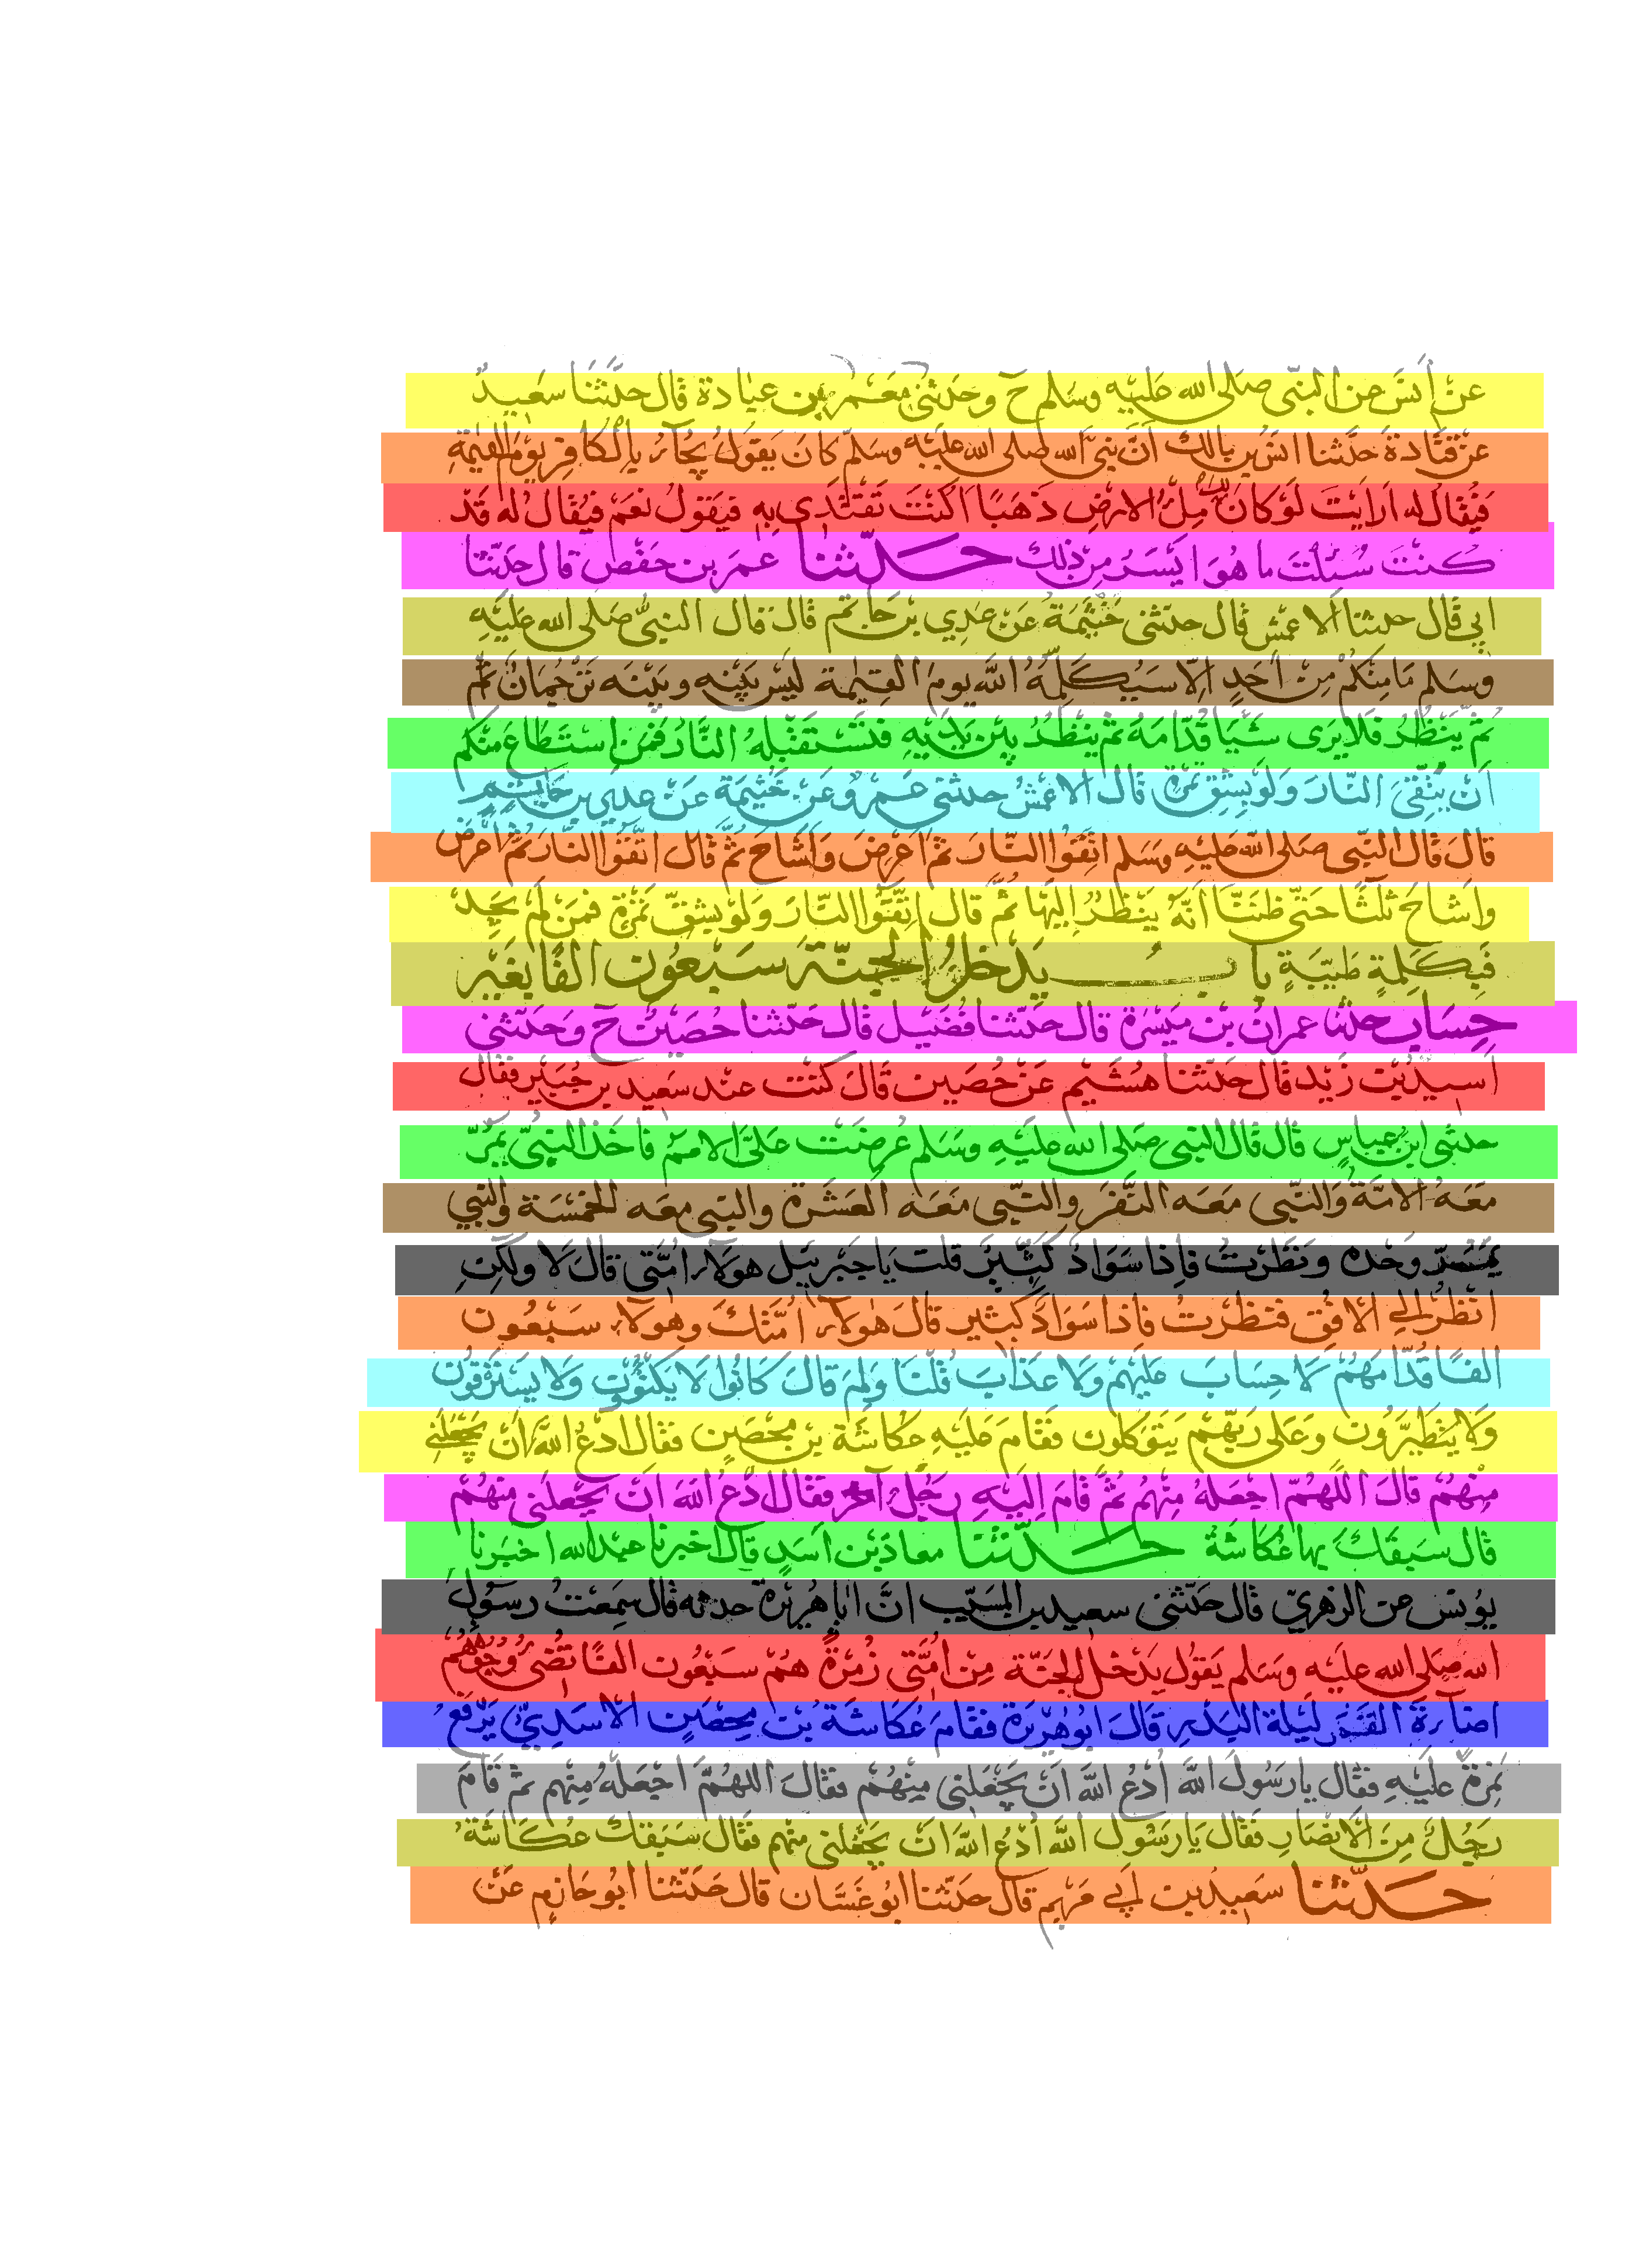

In [22]:
alpha=.6
cv2.addWeighted(RecImage1, alpha, imgcpy1, 1 - alpha,0, imgcpy1)
cv2_imshow(imgcpy1)

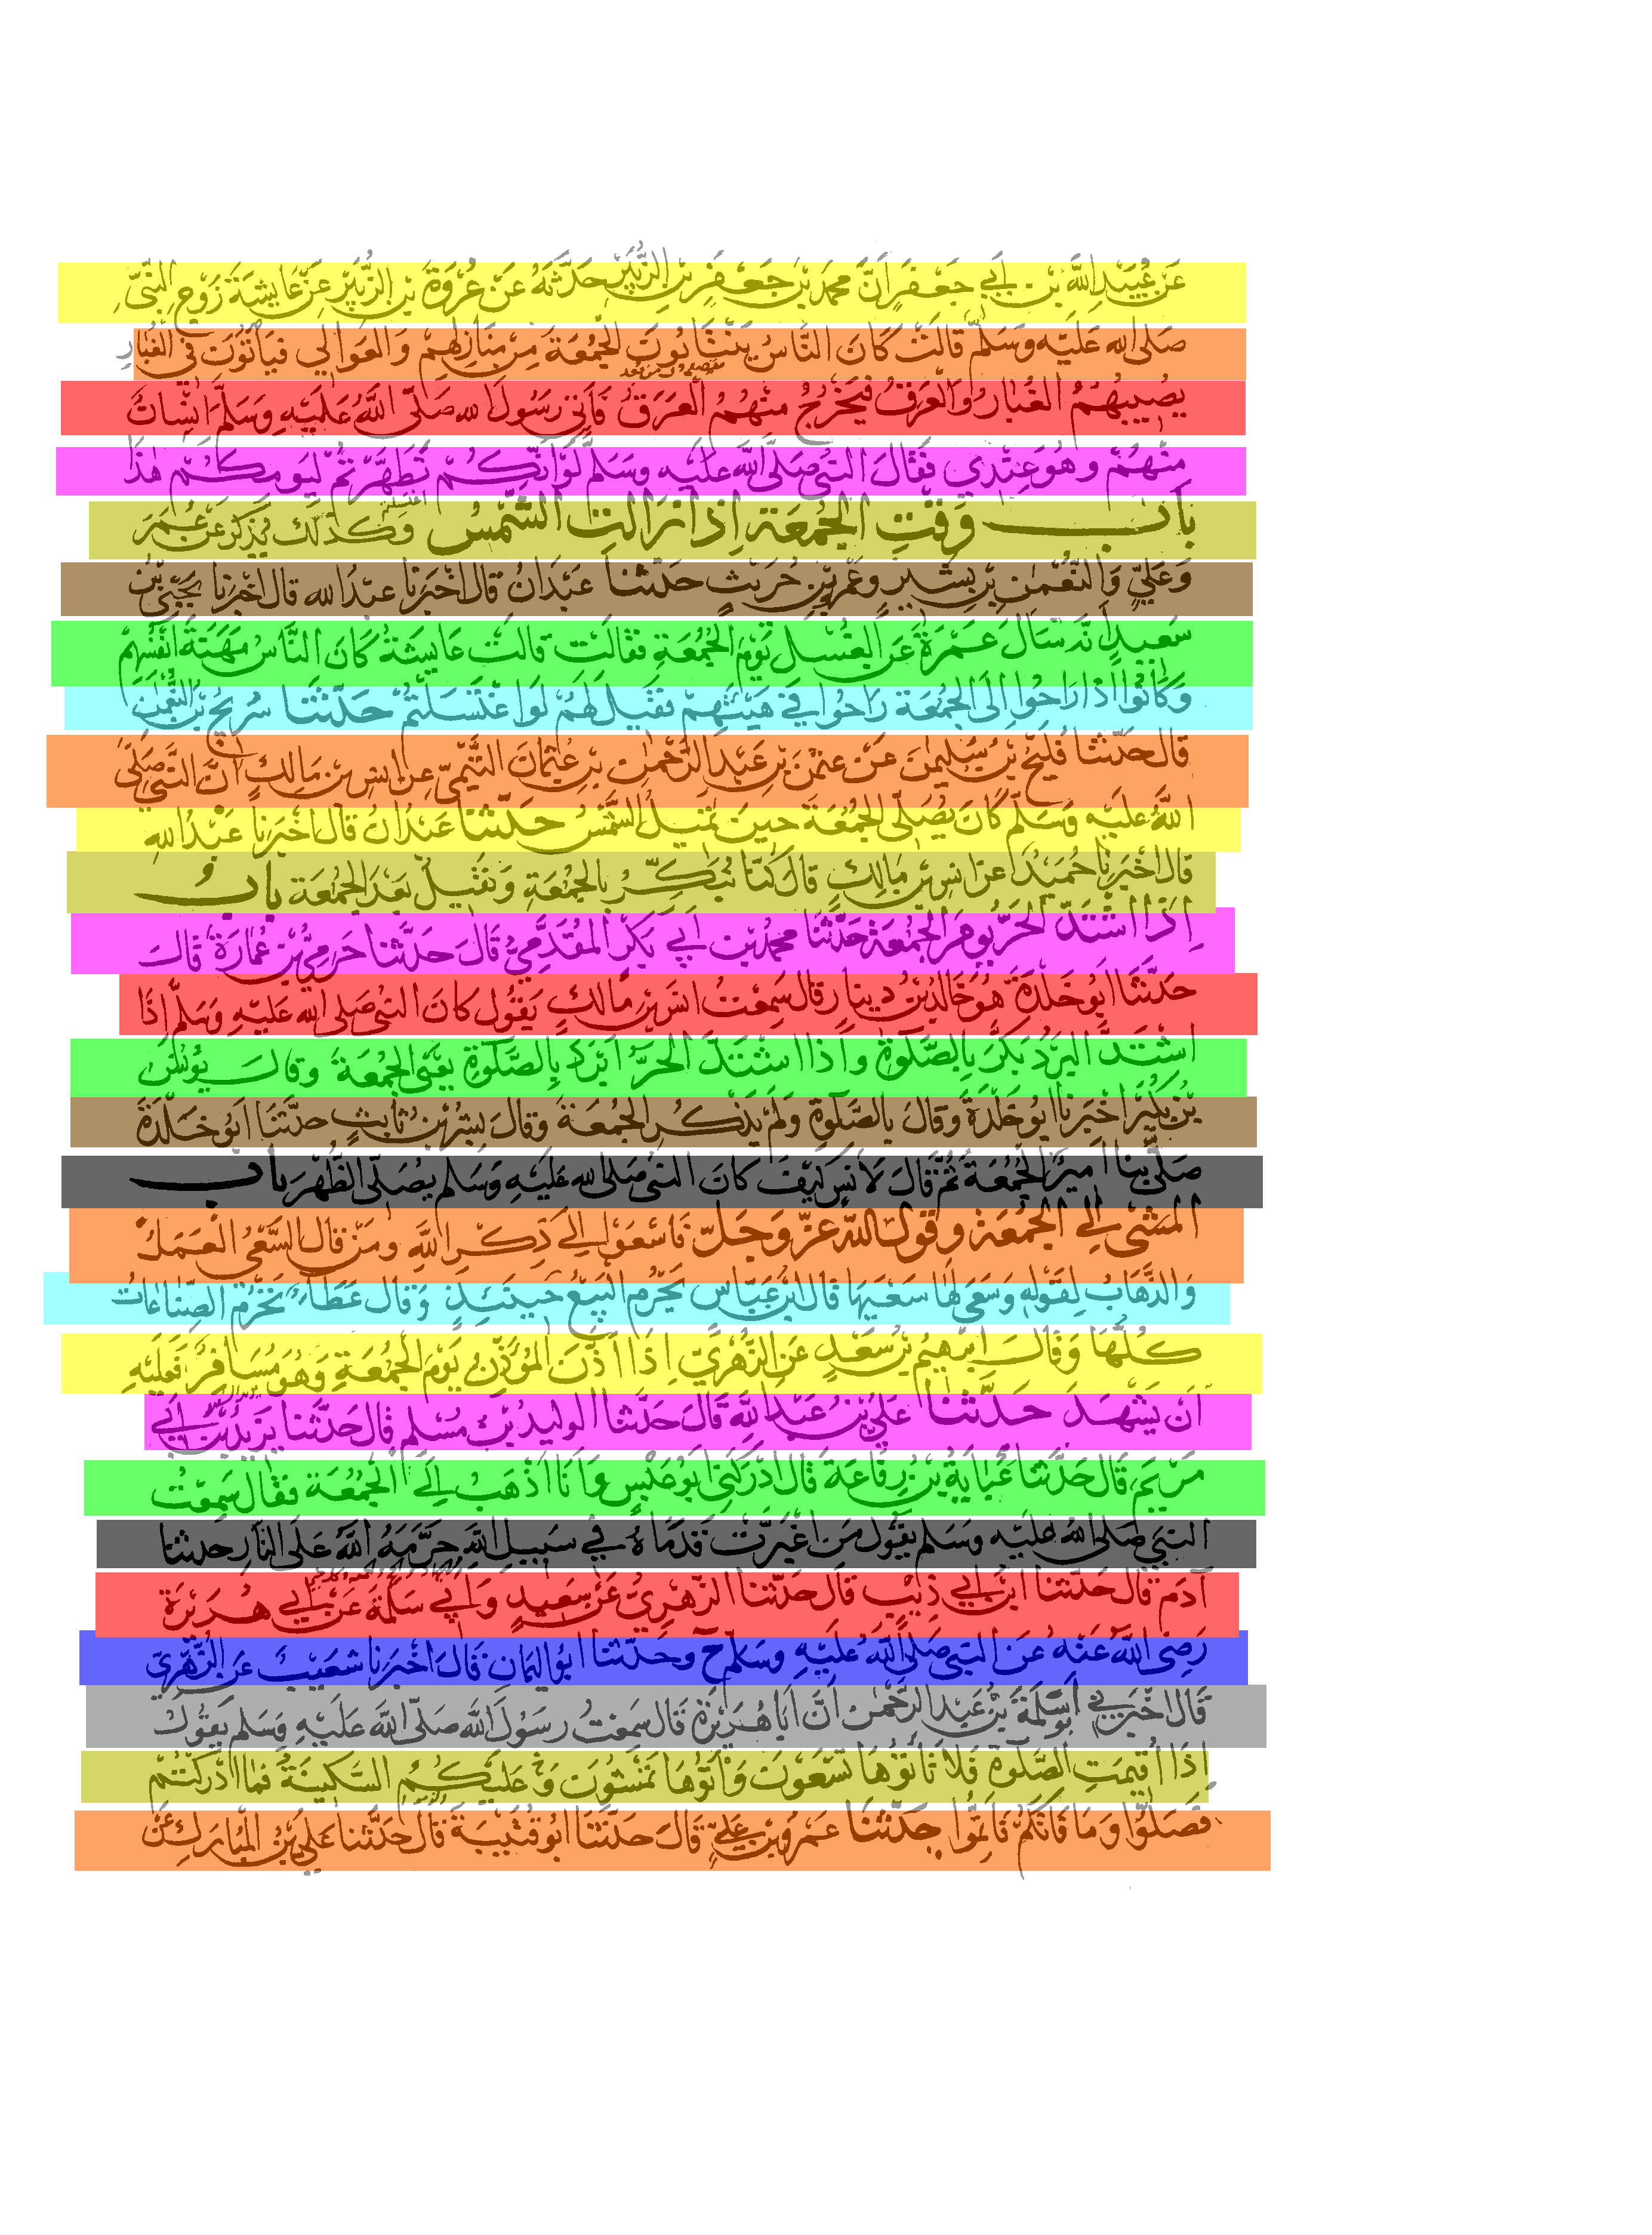

In [23]:
alpha=.6
cv2.addWeighted(RecImage2, alpha, imgcpy2, 1 - alpha,0, imgcpy2)
cv2_imshow(imgcpy2)

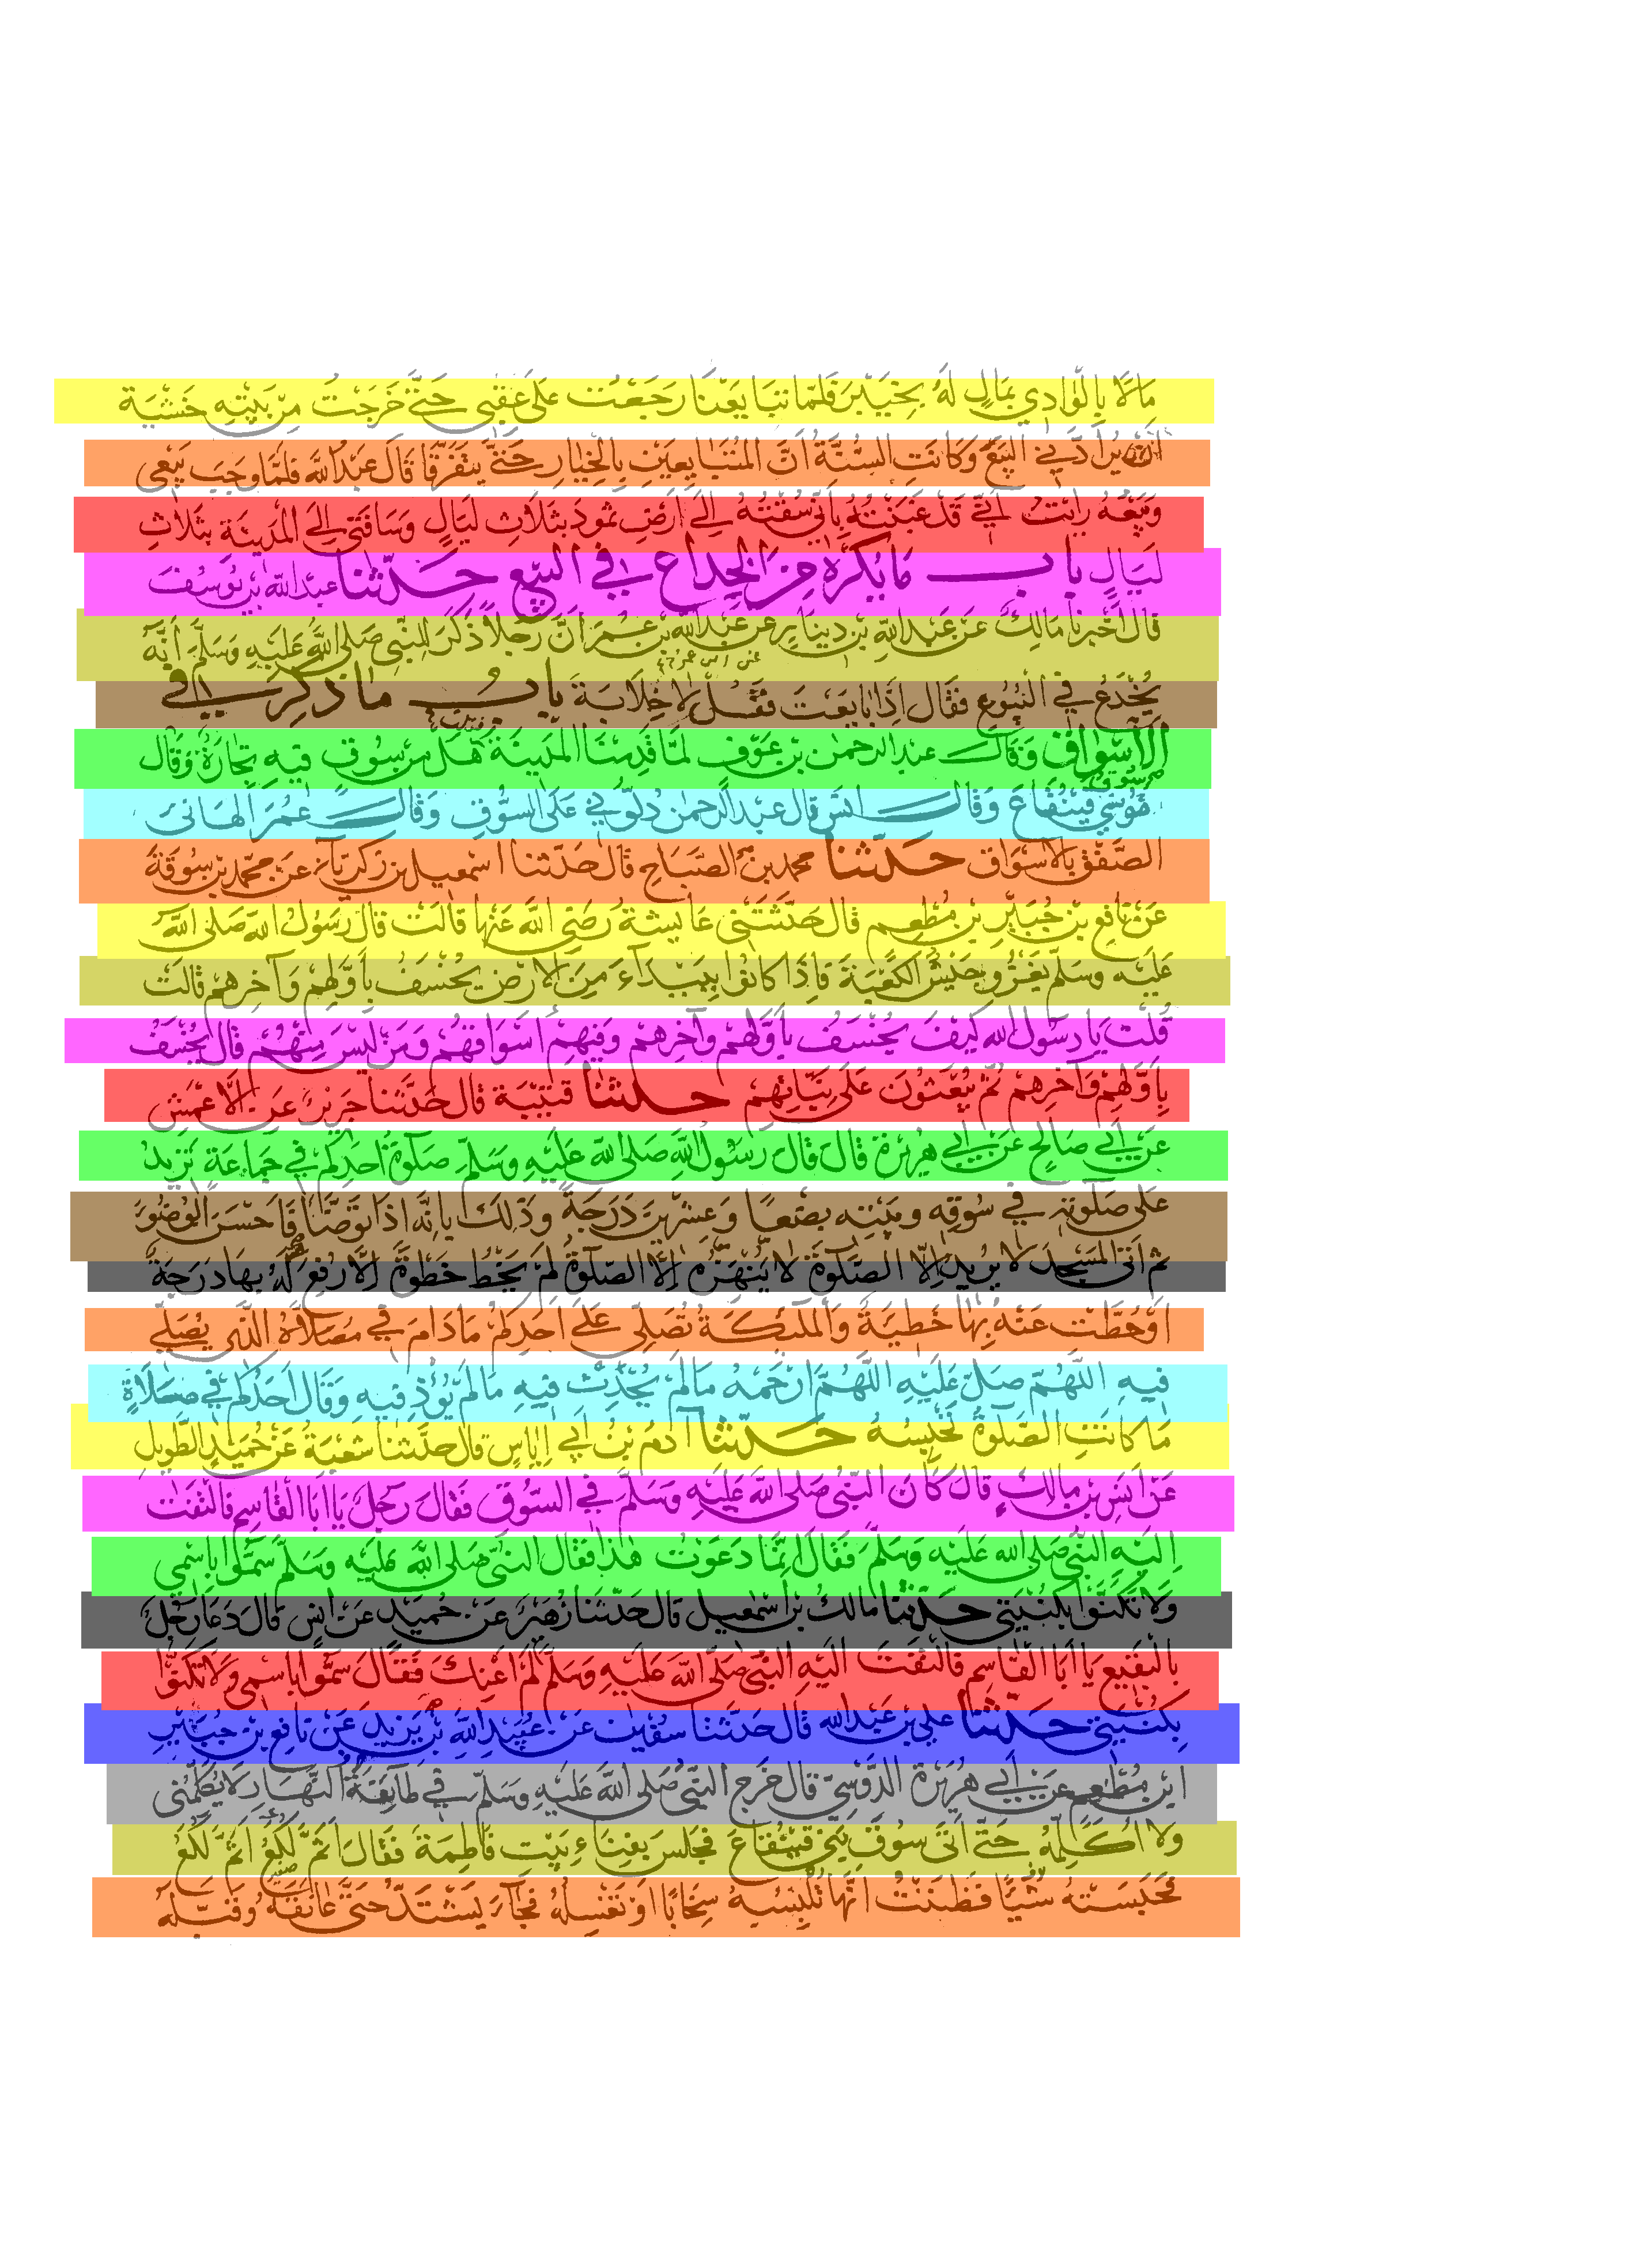

In [24]:
alpha=.6
cv2.addWeighted(RecImage3, alpha, imgcpy3, 1 - alpha,0, imgcpy3)
cv2_imshow(imgcpy3)